## House Price Prediction using Linear, Ridge and Lasso Regression
The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [449]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [450]:
housing = pd.read_csv("train.csv")

In [451]:
housing.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [452]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [453]:
# Checking for null data, looking at above details there are few columns that contain null information

housing.columns[housing.isnull().any()]
findnull=housing.isnull().sum()/len(housing)*100
findnull=findnull[findnull>0]
findnull.sort_values(inplace= True, ascending = False)
findnull


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [454]:
## Need to impute the data instead of dropping the columns which have null values

null_contained = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_contained:
    housing[i].fillna("none", inplace=True)

In [455]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [456]:

housing.columns[housing.isnull().any()]
findnull=housing.isnull().sum()/len(housing)*100
findnull=findnull[findnull>0]
findnull.sort_values(inplace= True, ascending = False)
findnull


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [457]:
## Still some data with null values. 
housing['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [458]:
housing['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [459]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [460]:
# Imputing the data so that we have all nulls covered and it contains the appropriate info to begin with. 


housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["Electrical"].dropna(inplace=True)

In [461]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC



- Data imputation done
- EDA to understand more about data

### Understanding the Data Dictionary
- The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [462]:
housing['LotFrontage'].astype('category').value_counts()

60.0     152
80.0     112
70.0      94
65.0      74
73.0      70
50.0      57
75.0      53
85.0      48
71.0      38
74.0      25
21.0      25
78.0      25
90.0      23
68.0      23
52.0      21
24.0      21
64.0      19
72.0      17
55.0      17
63.0      17
79.0      17
100.0     16
66.0      15
51.0      15
43.0      15
91.0      14
59.0      13
67.0      12
82.0      12
40.0      12
57.0      12
76.0      11
69.0      11
53.0      10
34.0      10
86.0      10
92.0      10
88.0      10
77.0       9
44.0       9
84.0       9
62.0       9
66.5       9
35.0       9
73.5       8
96.0       8
65.5       8
98.0       8
61.0       8
93.0       8
95.0       7
107.0      7
120.0      7
58.0       7
89.0       6
110.0      6
54.0       6
48.0       6
94.0       6
105.0      6
36.0       6
30.0       6
41.0       6
81.0       6
87.0       5
61.5       5
32.0       5
56.0       5
47.0       5
83.0       5
37.0       5
42.0       4
102.0      4
49.0       4
130.0      3
104.0      3
103.0      3

In [463]:
housing['MasVnrArea'].astype('category').value_counts()

0.0       869
180.0       8
108.0       8
72.0        8
16.0        7
120.0       7
200.0       6
80.0        6
340.0       6
106.0       6
170.0       5
320.0       5
132.0       5
84.0        5
360.0       5
178.0       4
100.0       4
268.0       4
76.0        4
252.0       4
220.0       4
456.0       4
160.0       4
216.0       4
270.0       4
196.0       4
183.0       4
210.0       4
246.0       4
168.0       4
40.0        4
300.0       4
288.0       4
336.0       4
136.0       3
116.0       3
226.0       3
130.0       3
110.0       3
312.0       3
44.0        3
104.0       3
145.0       3
240.0       3
99.0        3
186.0       3
128.0       3
166.0       3
42.0        3
148.0       3
90.0        3
176.0       3
169.0       3
350.0       3
272.0       3
70.0        3
74.0        3
256.0       3
174.0       3
420.0       3
208.0       3
82.0        3
50.0        3
85.0        3
189.0       2
338.0       2
184.0       2
351.0       2
318.0       2
206.0       2
182.0       2
172.0 

In [464]:
housing.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [465]:
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

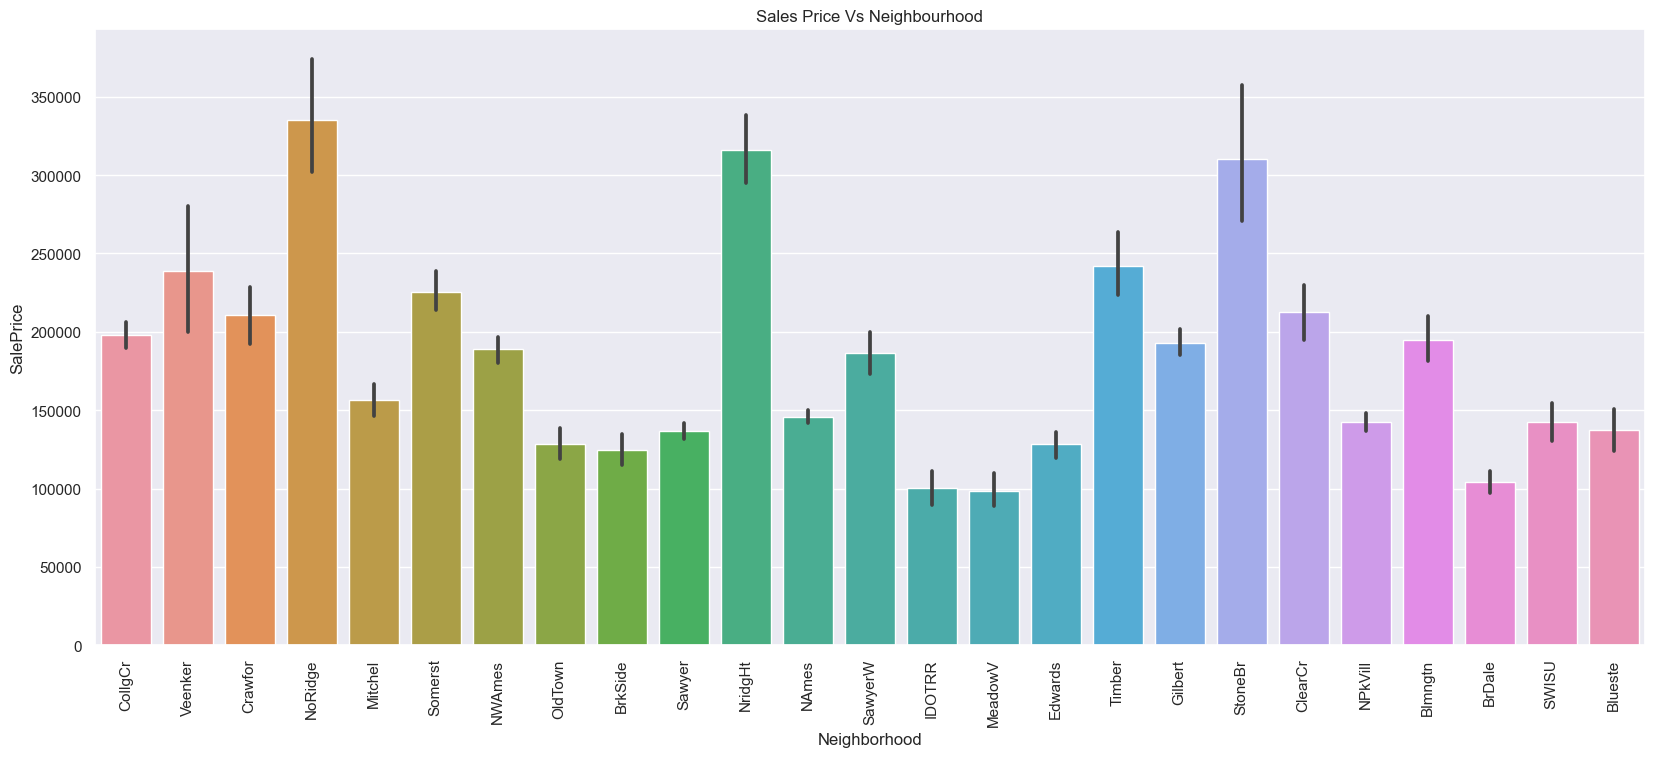

In [466]:
# Comparing Salesprice to neighbourhood

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sales Price Vs Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

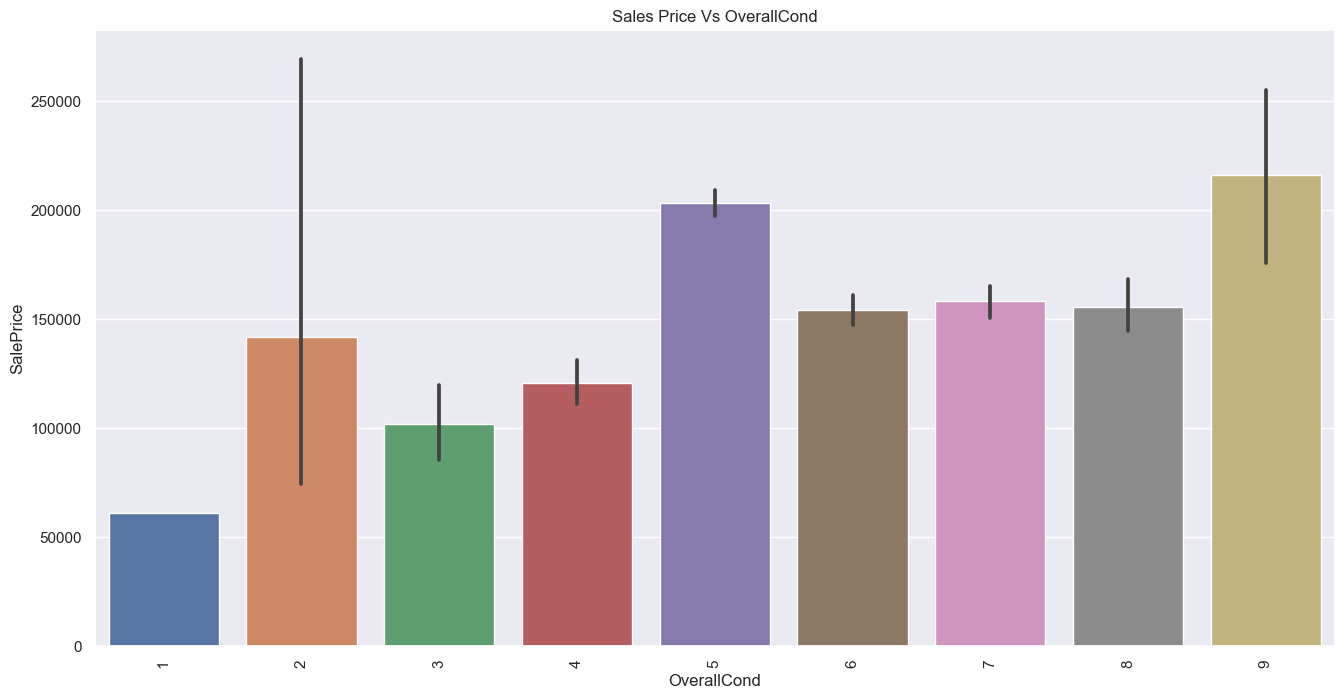

In [467]:
# Comparing Salesprice to OverallCond

plt.figure(figsize=(16, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing)
plt.title("Sales Price Vs OverallCond")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

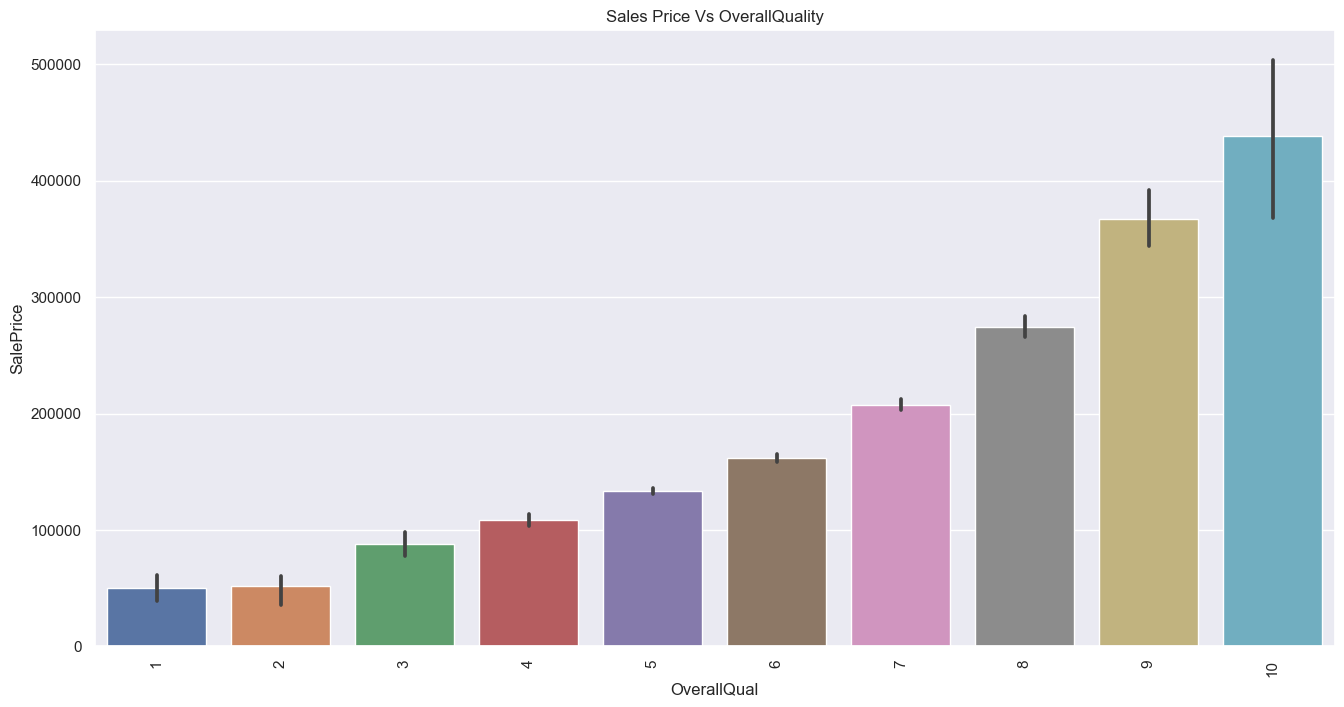

In [468]:
# Comparing Salesprice to Overallquality

plt.figure(figsize=(16, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing)
plt.title("Sales Price Vs OverallQuality")
plt.xticks(rotation=90)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

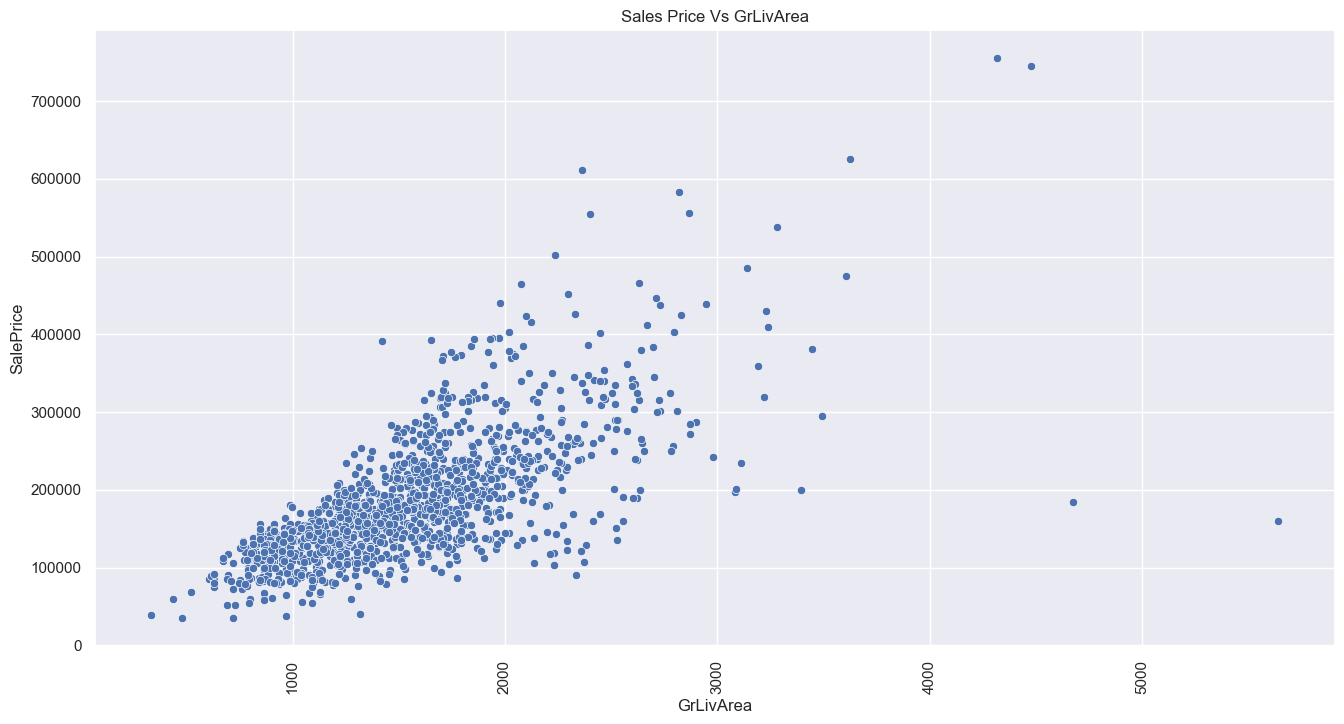

In [469]:
housing['GrLivArea'].astype('category').value_counts()

# Comparing Salesprice to Living area

plt.figure(figsize=(16, 8))
sns.scatterplot(x="GrLivArea", y="SalePrice", data= housing)
plt.title("Sales Price Vs GrLivArea")
plt.xticks(rotation=90)

In [470]:
housing['TotalBsmtSF'].astype('category').value_counts()



0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
780     11
848     11
894     11
832     10
952      9
756      9
630      9
936      8
1056     8
840      7
600      7
384      7
483      7
720      7
1008     7
876      6
796      6
884      6
858      6
1362     6
1392     6
1440     5
686      5
990      5
970      5
960      5
1144     5
1092     5
684      5
928      5
1728     5
992      5
896      5
793      5
1029     4
784      4
980      4
660      4
924      4
689      4
698      4
910      4
880      4
804      4
764      4
735      4
855      4
847      4
747      4
1050     4
1026     4
1057     4
1080     4
1208     4
1188     4
1314     4
588      4
1494     4
616      4
546      4
1078     4
1064     4
798      3
1372     3
1844     3
882      3
1237     3
1240     3
1248     3
866      3
1258     3
1268     3
861      3
788      3
856      3
1453     3
1686     3
1466     3
1800     3
845      3
1470     3
1216     3
833      3

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

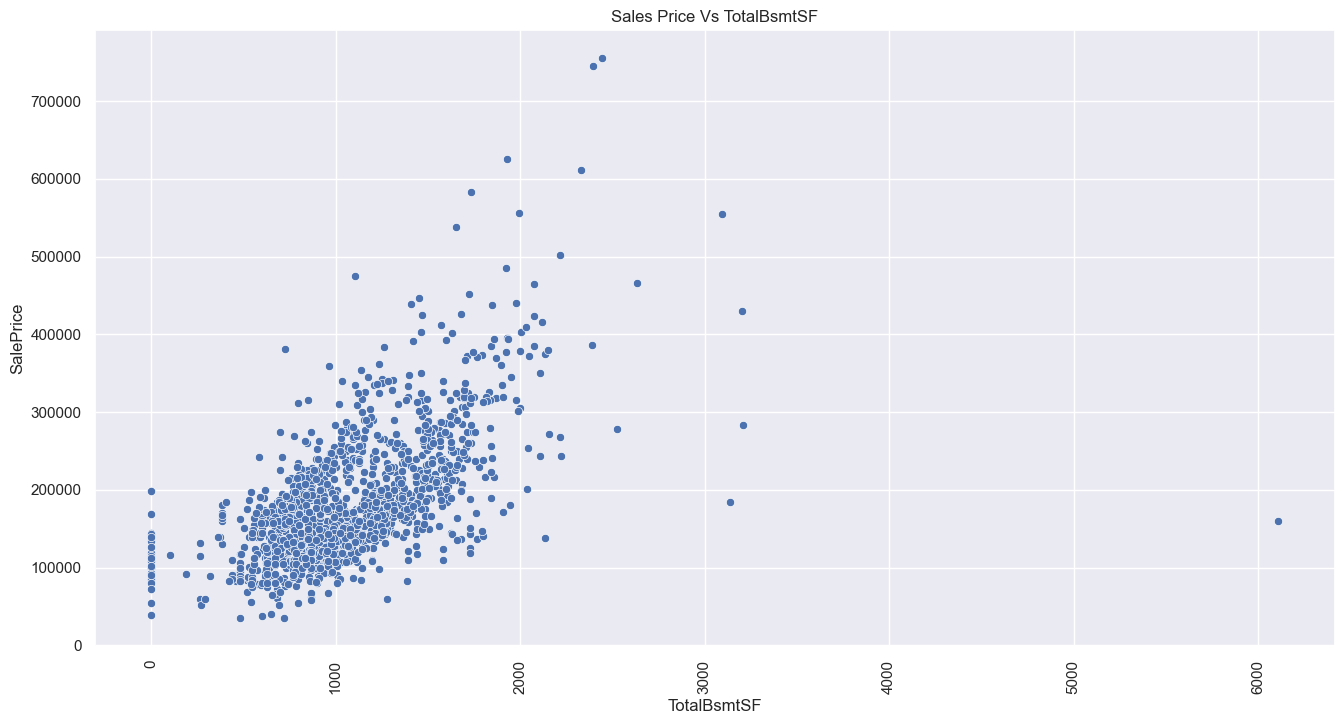

In [471]:
# Comparing Salesprice to TotalBsmtSF

plt.figure(figsize=(16, 8))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data= housing)
plt.title("Sales Price Vs TotalBsmtSF")
plt.xticks(rotation=90)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

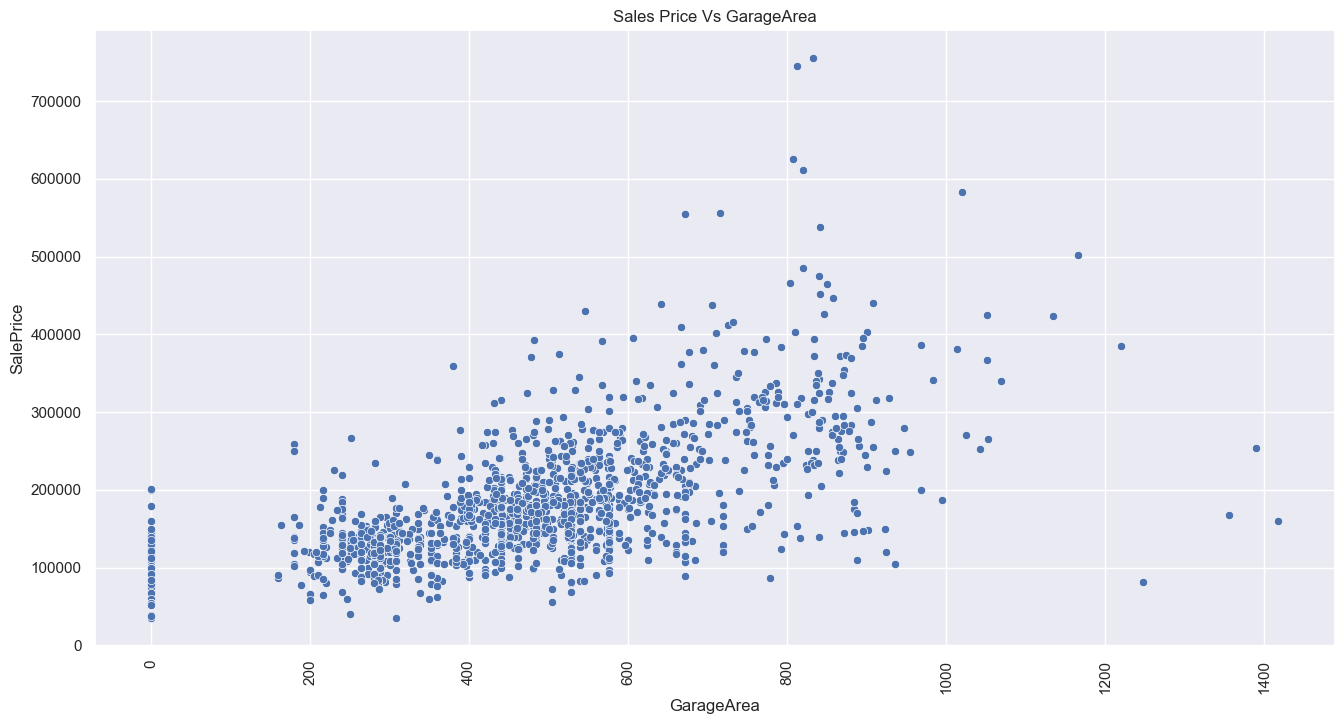

In [472]:
# Comparing Salesprice to GarageArea

plt.figure(figsize=(16, 8))
sns.scatterplot(x="GarageArea", y="SalePrice", data= housing)
plt.title("Sales Price Vs GarageArea")
plt.xticks(rotation=90)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

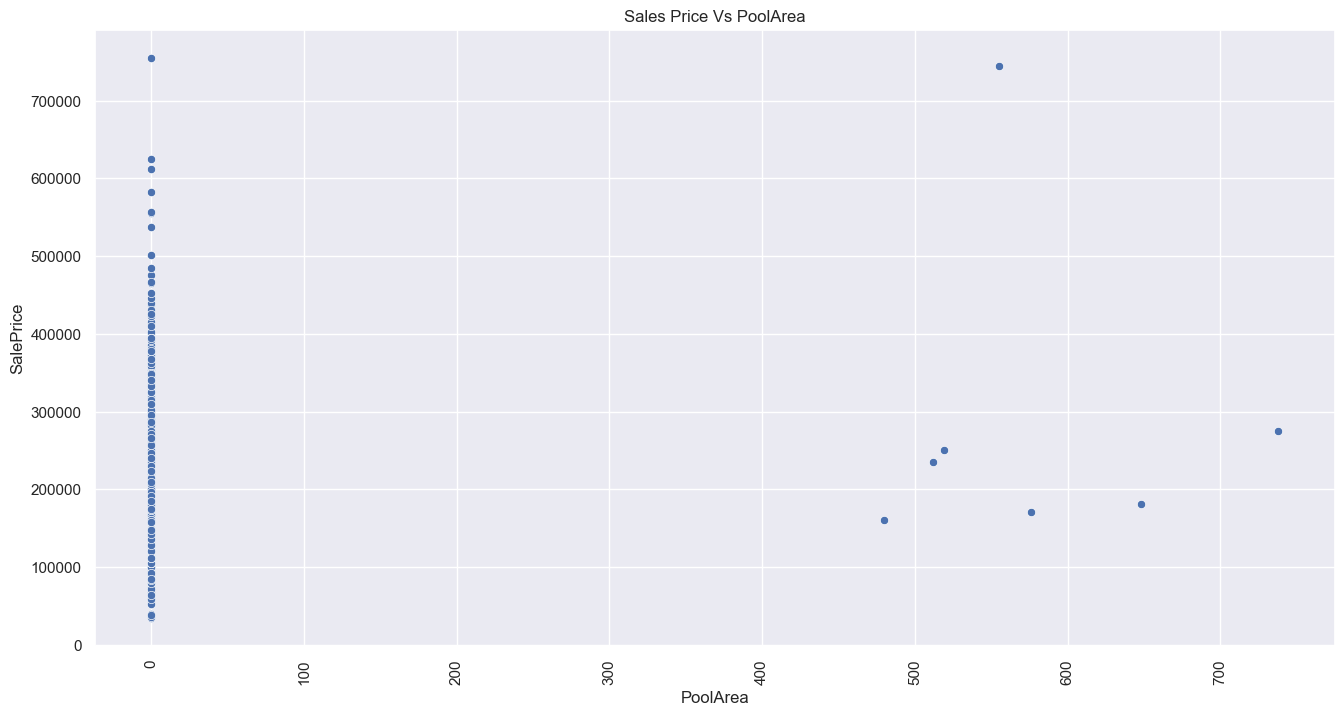

In [473]:

plt.figure(figsize=(16, 8))
sns.scatterplot(x="PoolArea", y="SalePrice", data= housing)
plt.title("Sales Price Vs PoolArea")
plt.xticks(rotation=90)

### There is some significance for Garage Area and Basement sqft Area no relevance for Pool Area compare to price.


In [474]:
# Property Age derived column
housing['PropAge'] = (housing['YrSold'] - housing['YearBuilt'])
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   none  none        none       0      2   2008   
1         Lvl    AllPub  ...   none  none        none       0      5   2007   
2         Lvl    AllPub  ...   none  none        none       0      9   2008   
3         Lvl    AllPub  ...   none  none        none       0      2   2006   
4         Lvl    AllPub  ...   none  none        none       0     12   2008   

  SaleType  SaleCondition  SalePrice  PropAge  
0       WD         Normal     208500        5  
1       WD         Normal     181500       31  
2       WD         Normal     223500        7  
3       WD        Abnorml     140000       91  
4       WD         Normal     250000        8  

[5 rows x 82 columns]

Text(0.5, 1.0, 'Sales Price Vs PropAge')

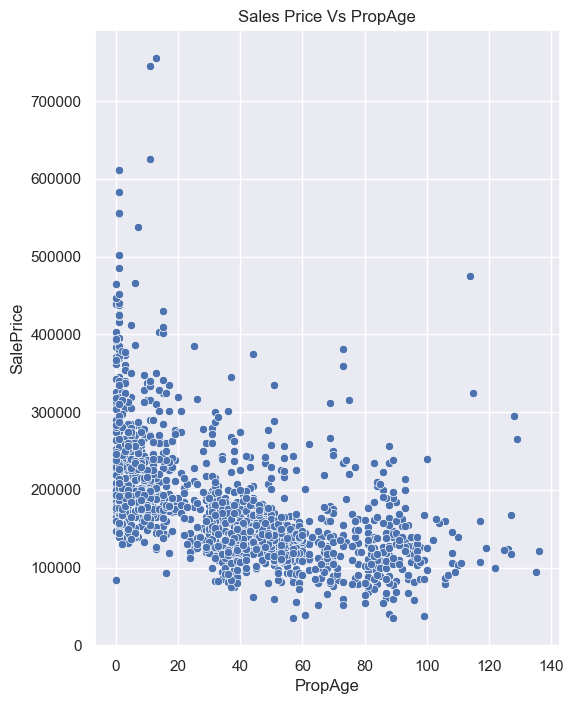

In [475]:
plt.figure(figsize=(6, 8))
sns.scatterplot(x="PropAge", y="SalePrice", data= housing)
plt.title("Sales Price Vs PropAge")


<Axes: xlabel='SalePrice', ylabel='Density'>

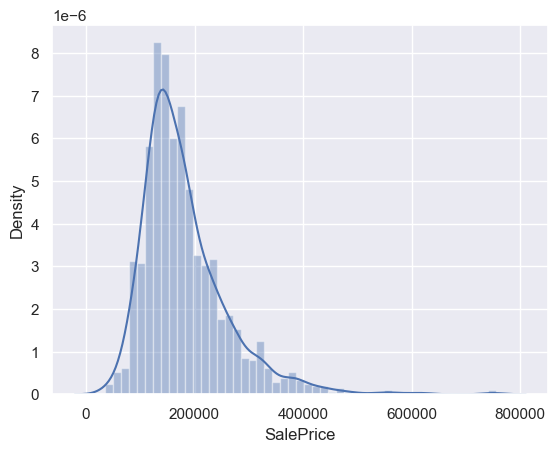

In [476]:
sns.distplot(housing['SalePrice'])

In [477]:
## Log transform the target variable
housing['SalePrice'] = np.log(housing['SalePrice'])
housing_numeric['SalePrice'] = np.log(housing_numeric['SalePrice'])

In [478]:
housing_numeric = housing_numeric.drop(['Id'], axis =1)
housing_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216  

[5 rows x 37 columns]

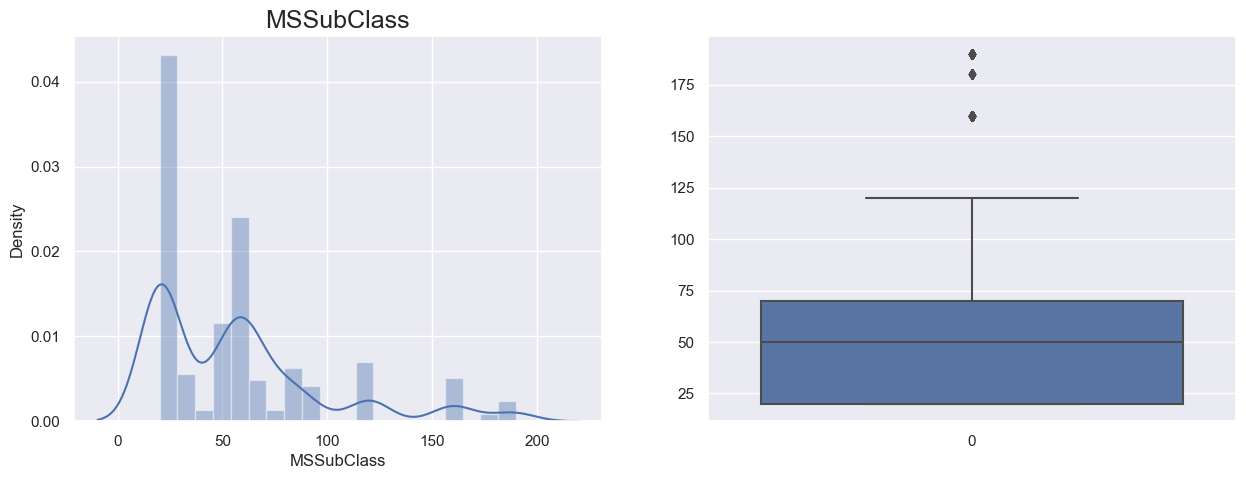

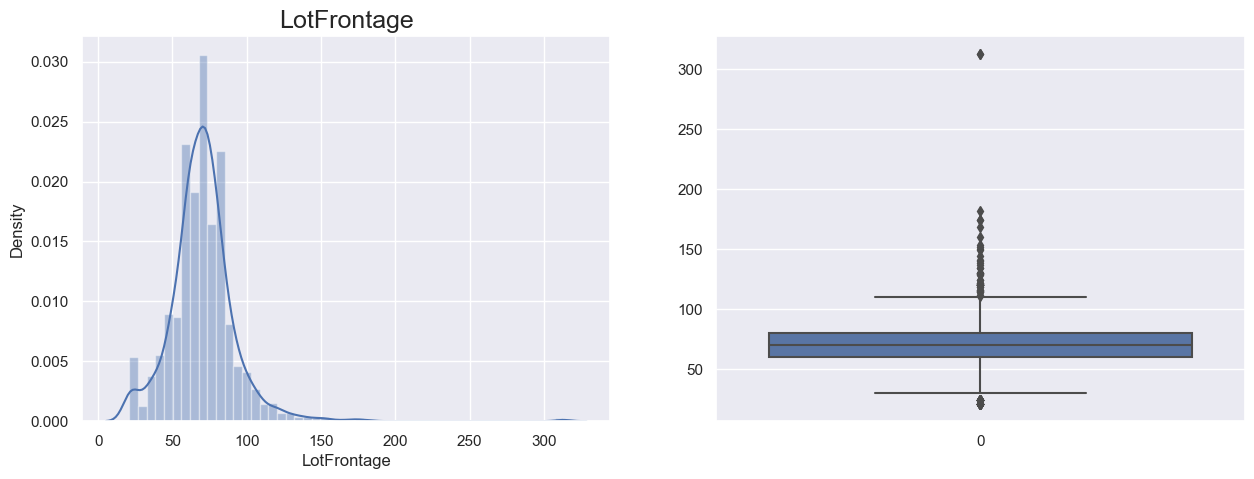

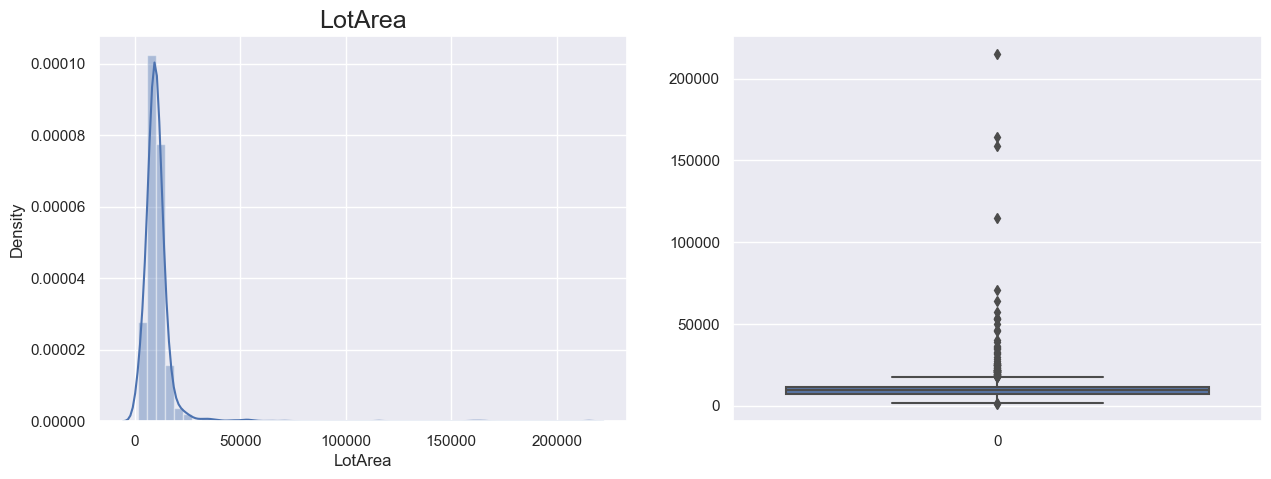

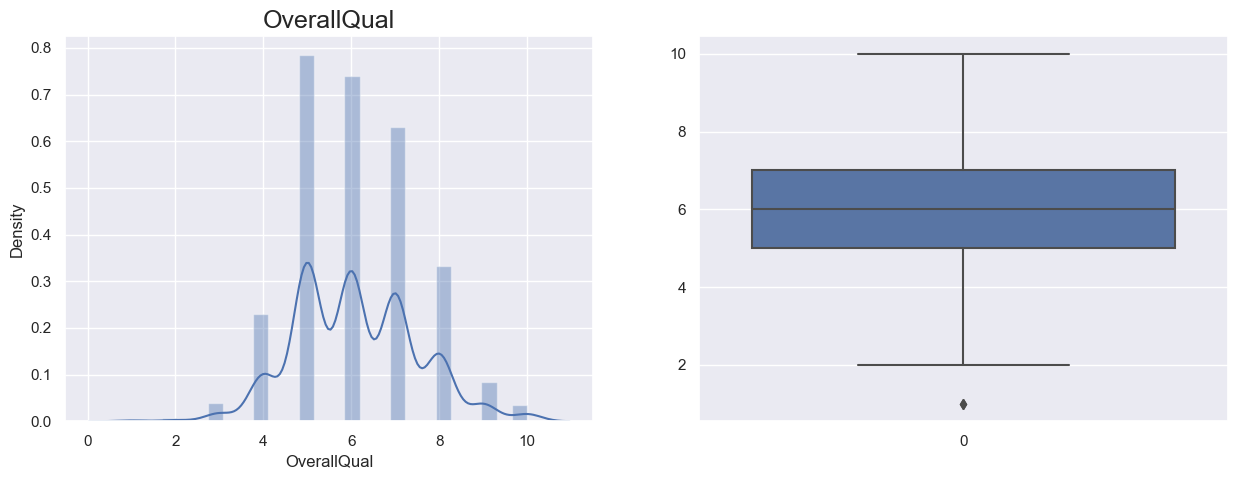

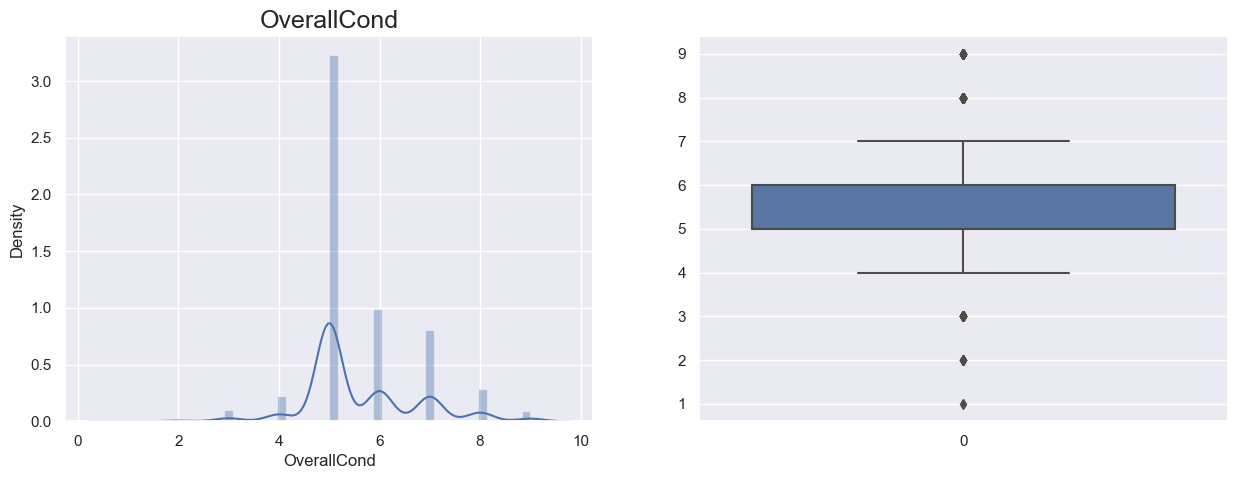

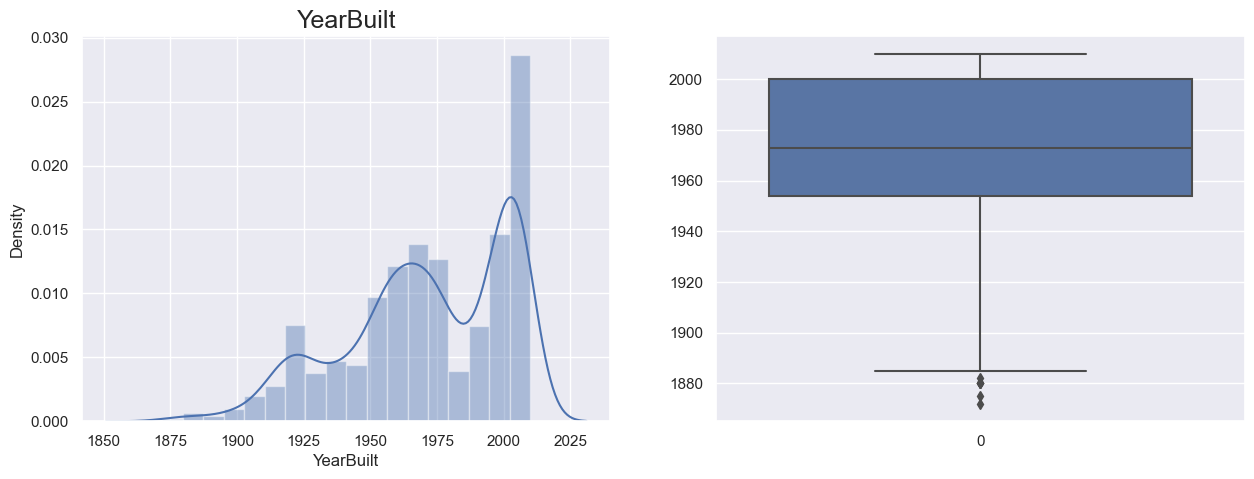

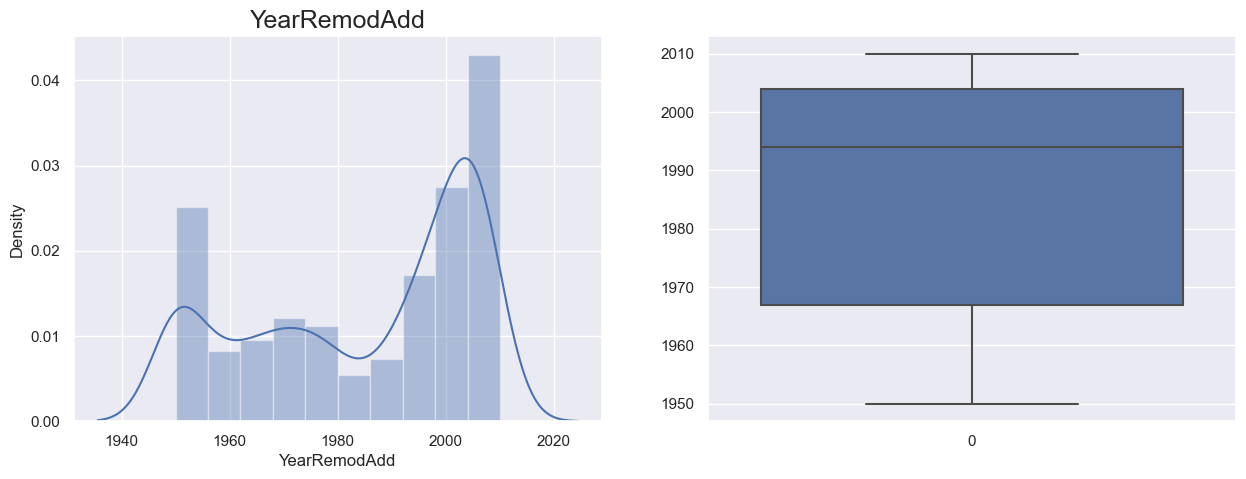

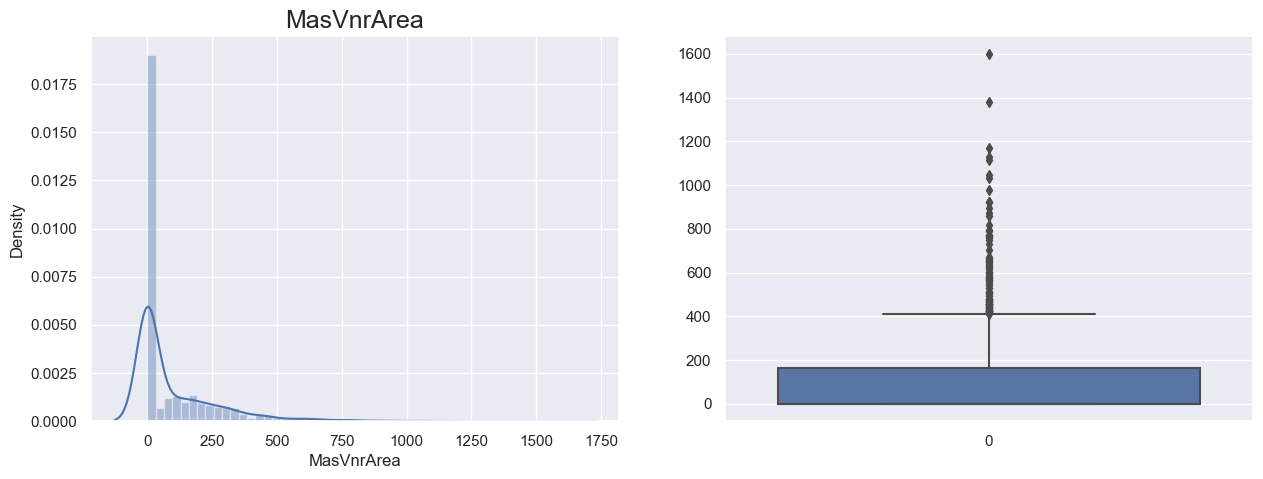

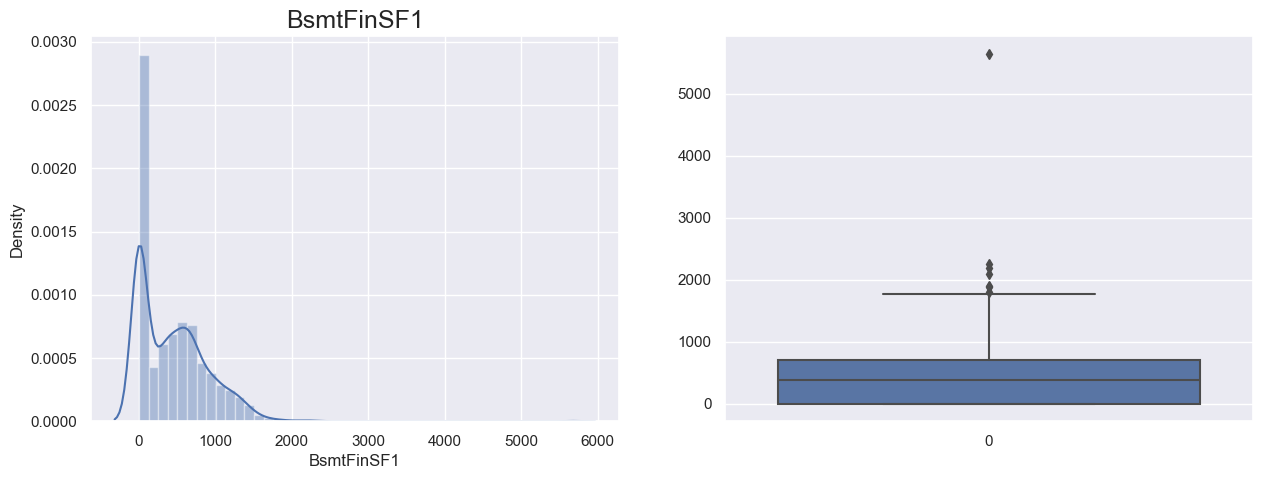

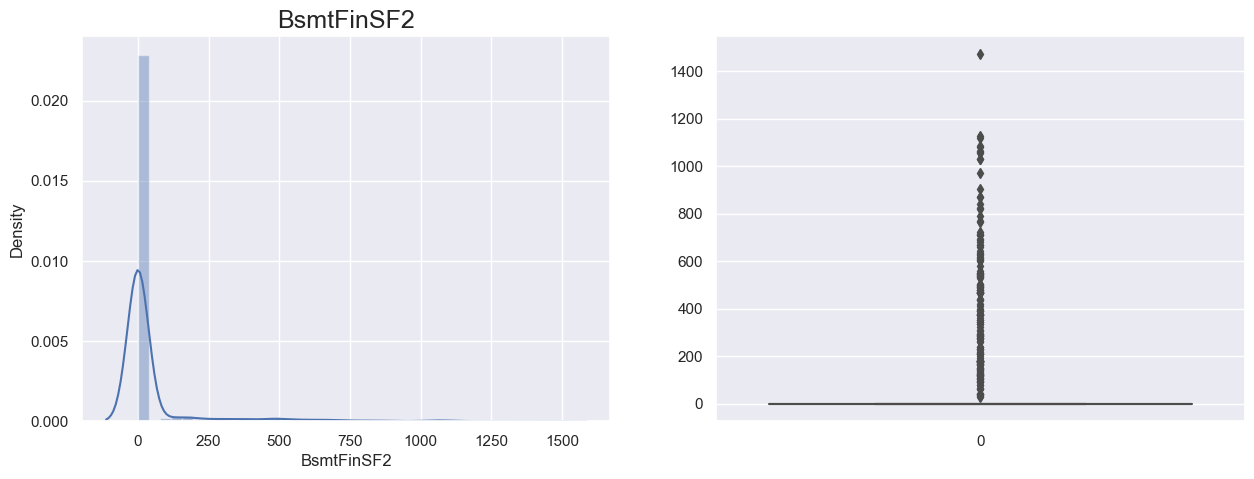

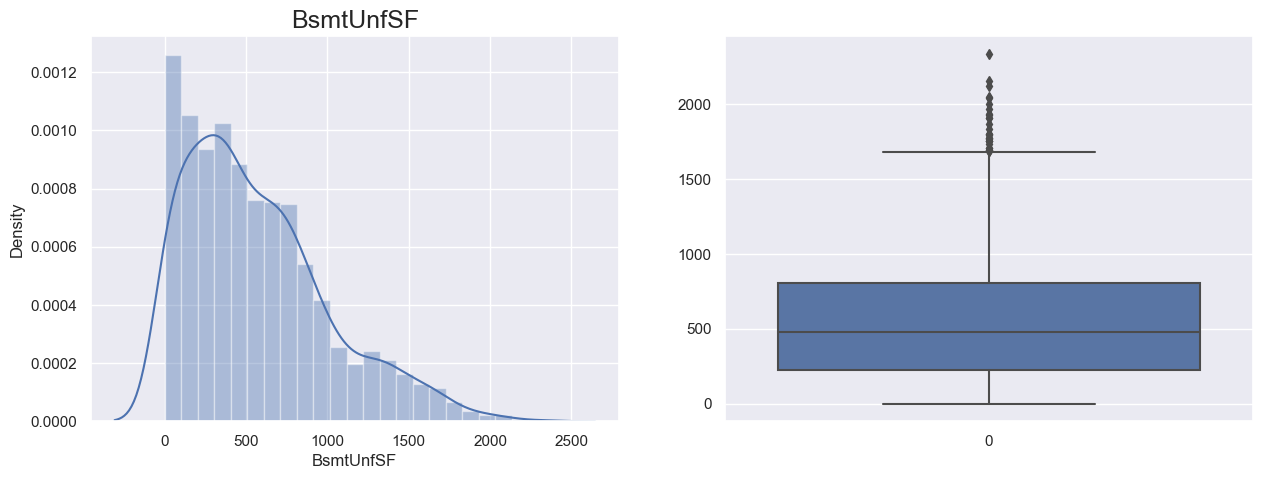

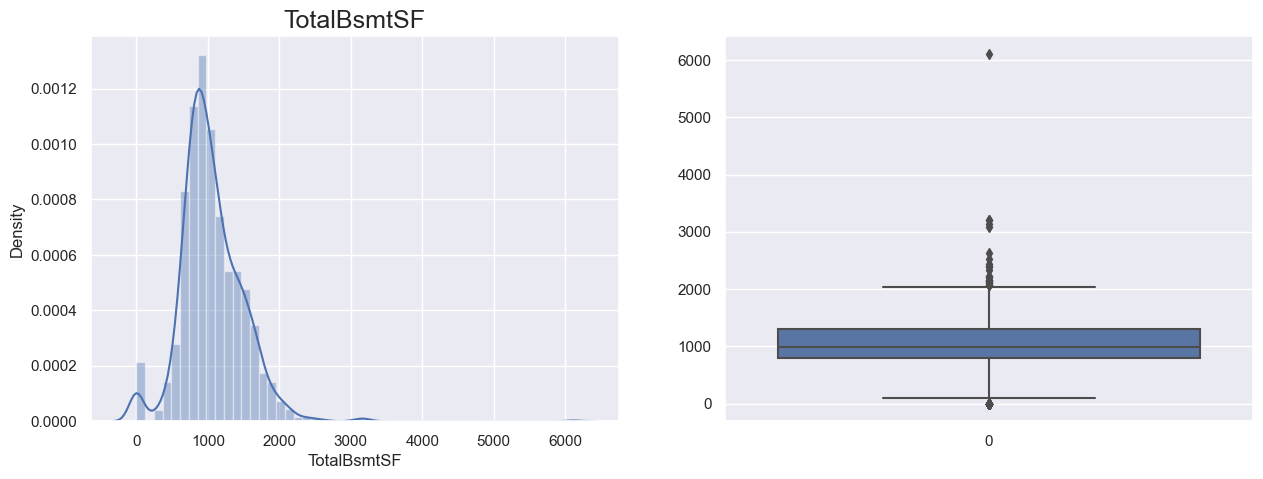

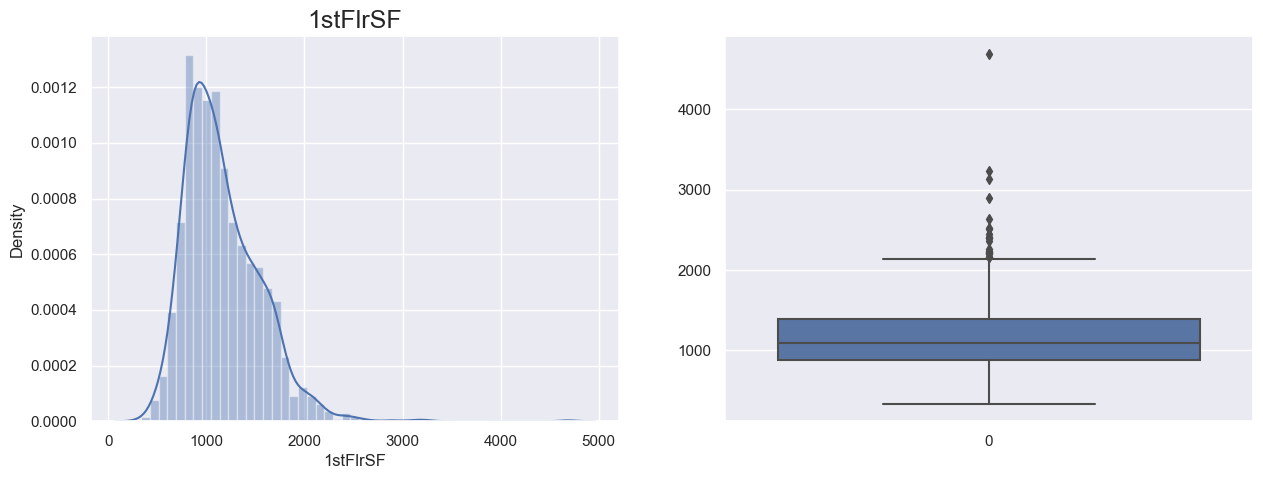

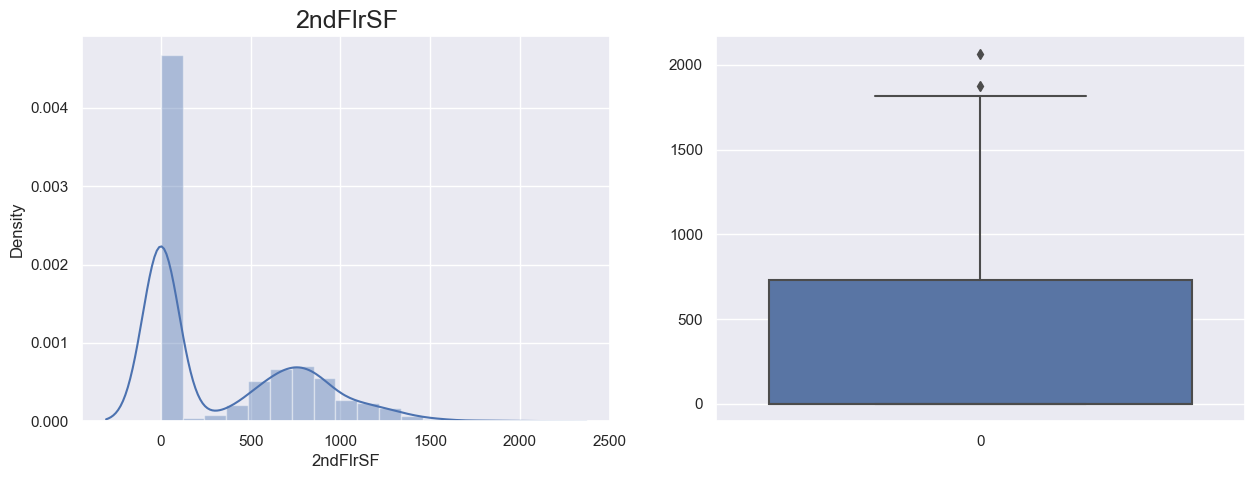

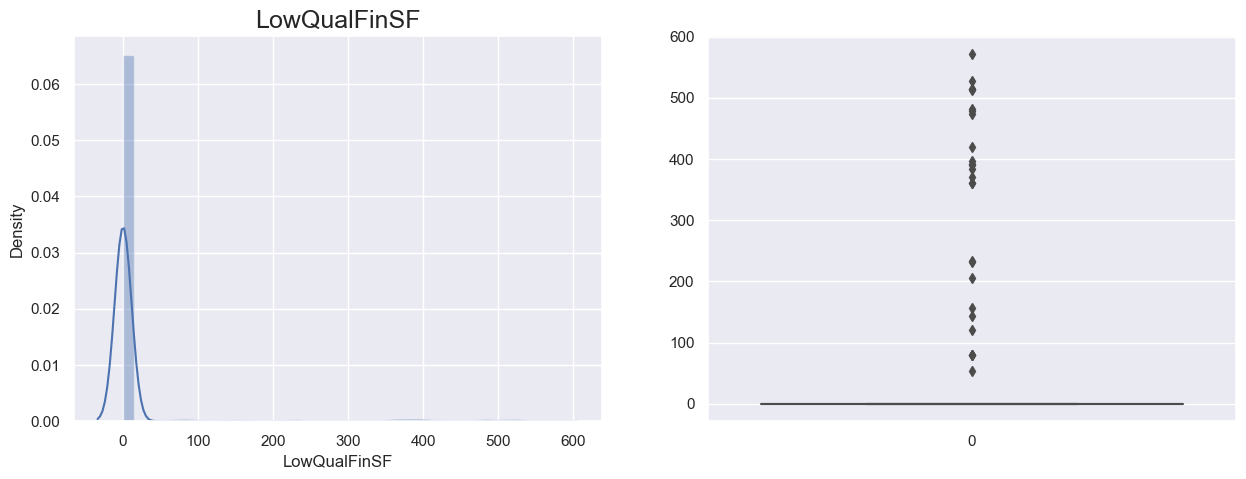

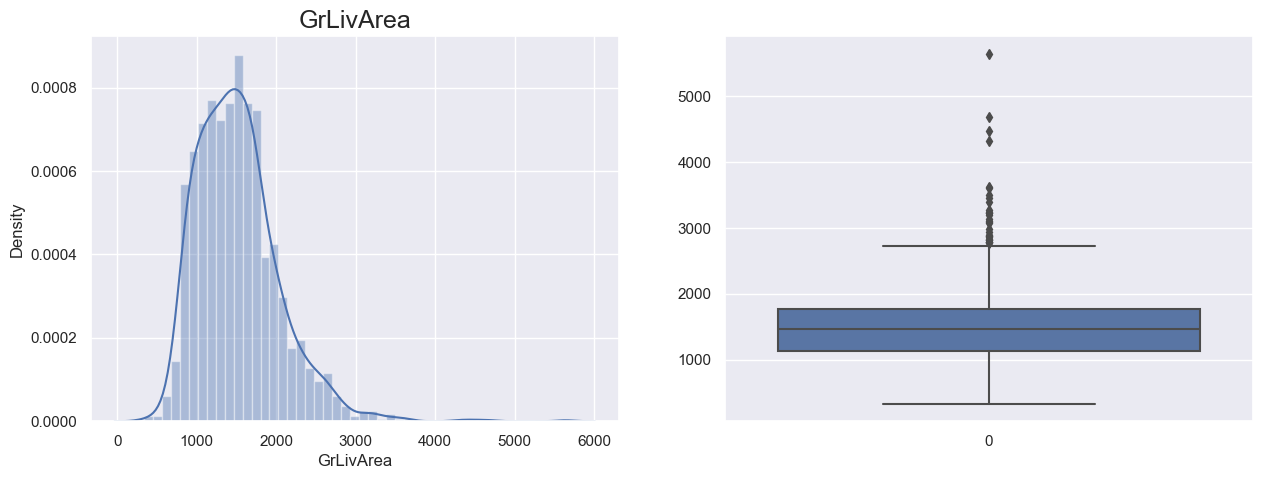

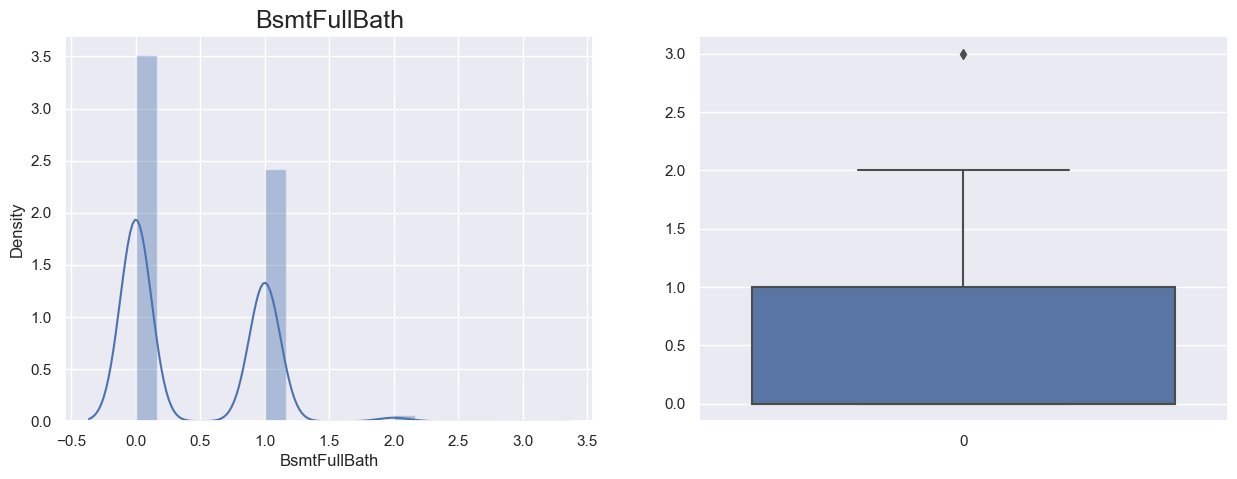

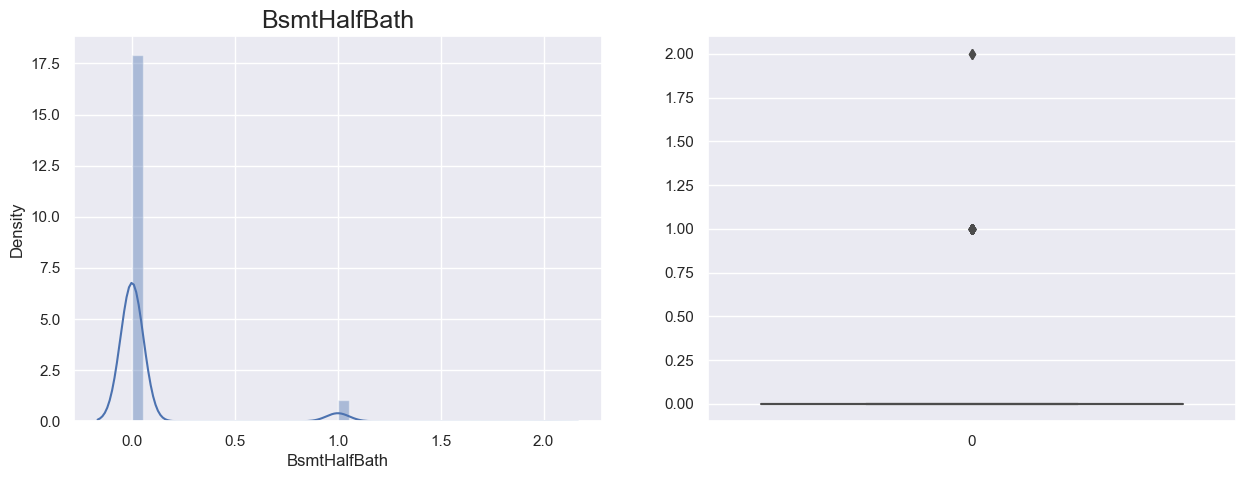

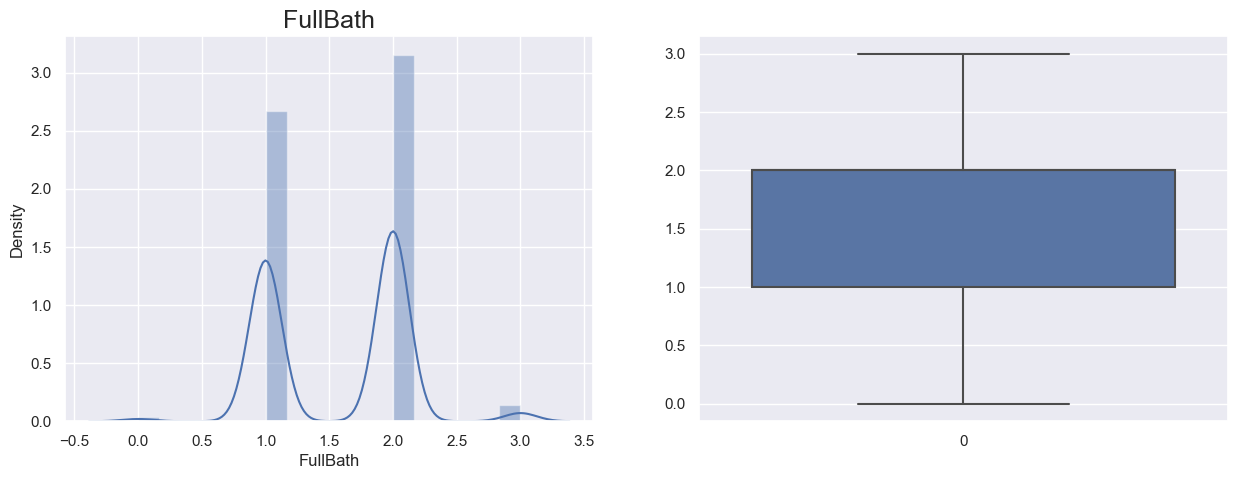

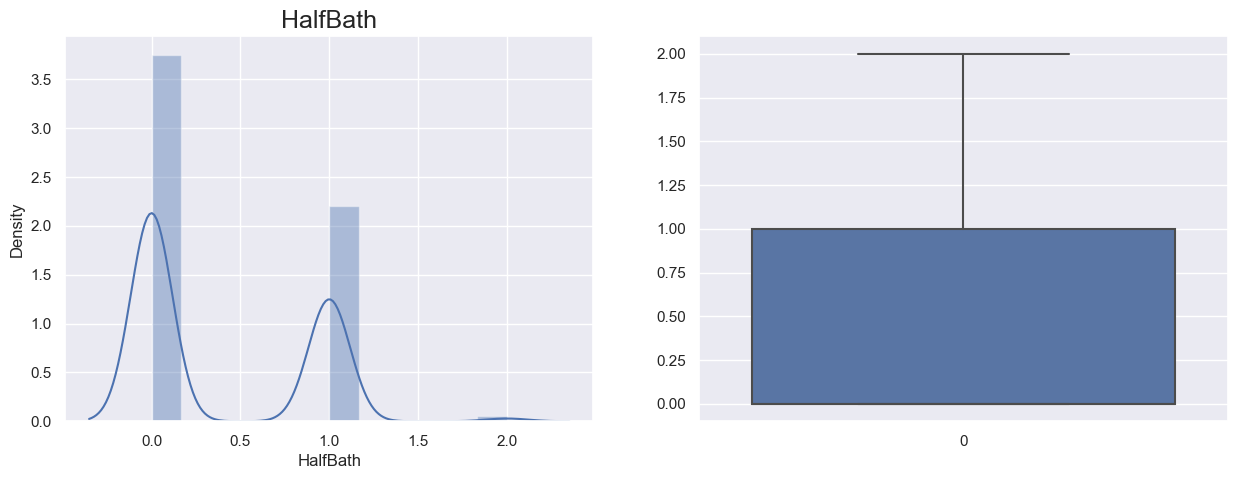

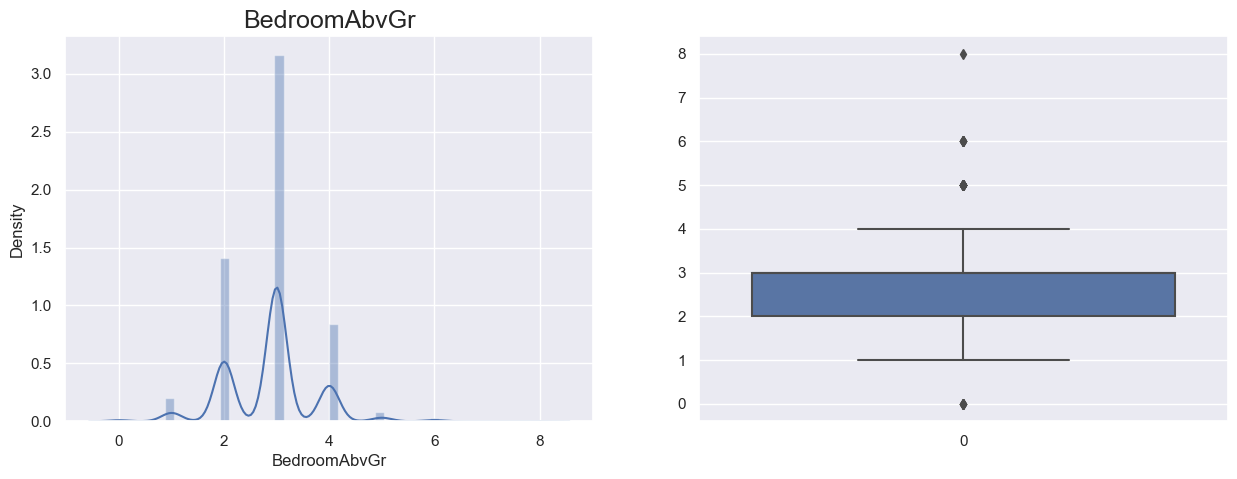

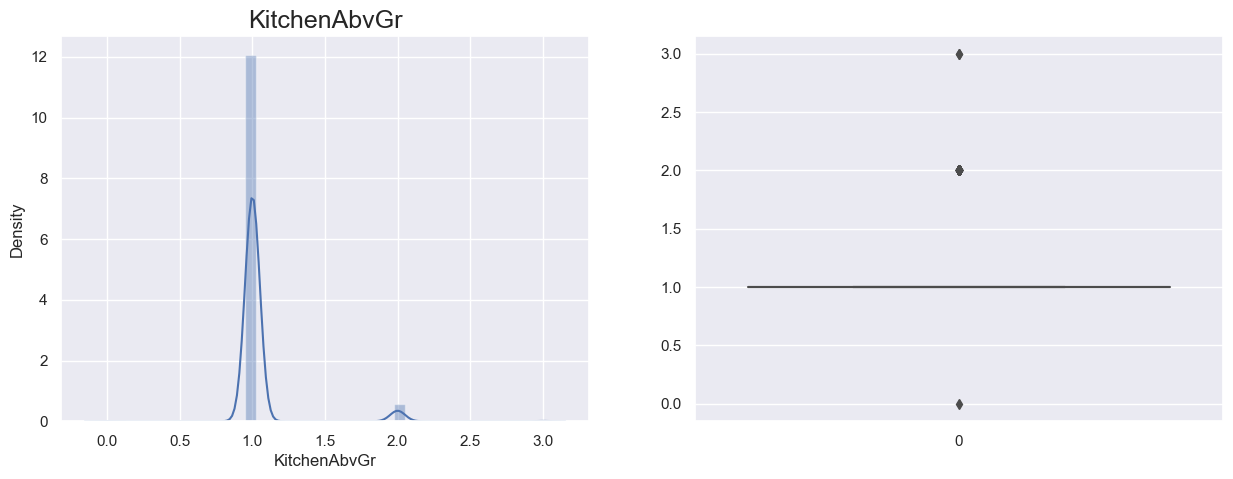

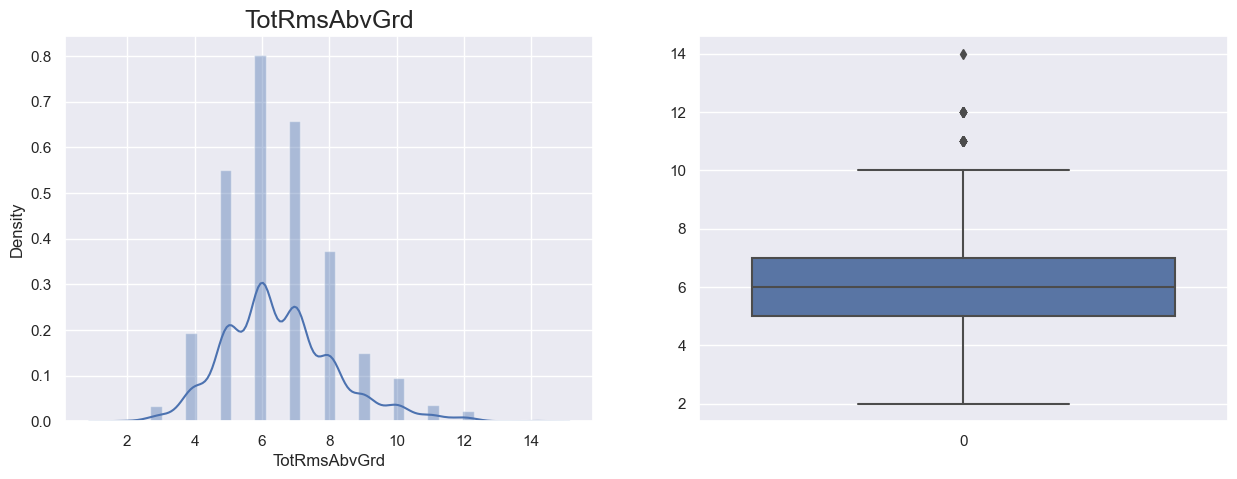

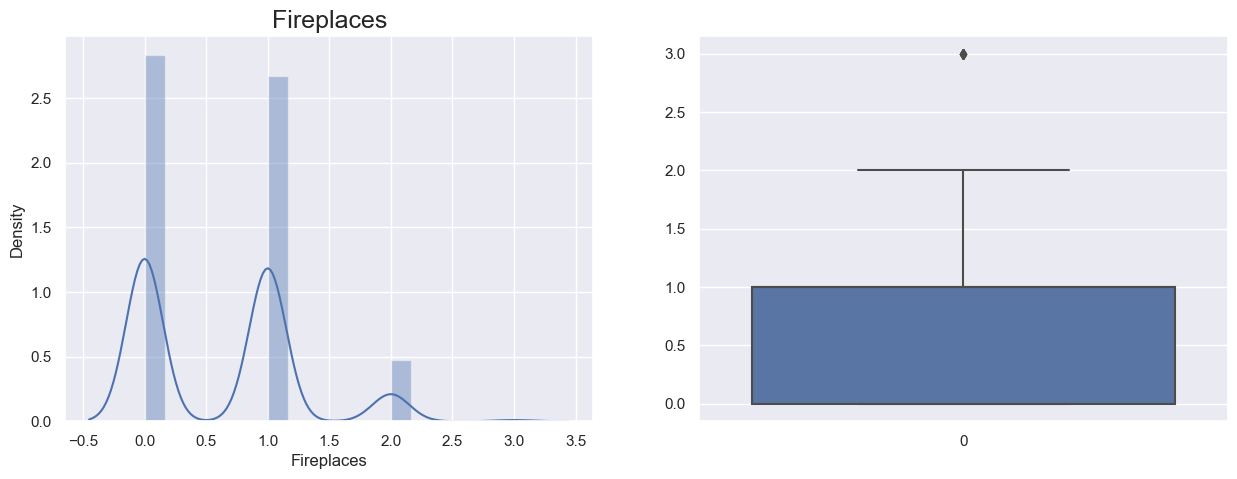

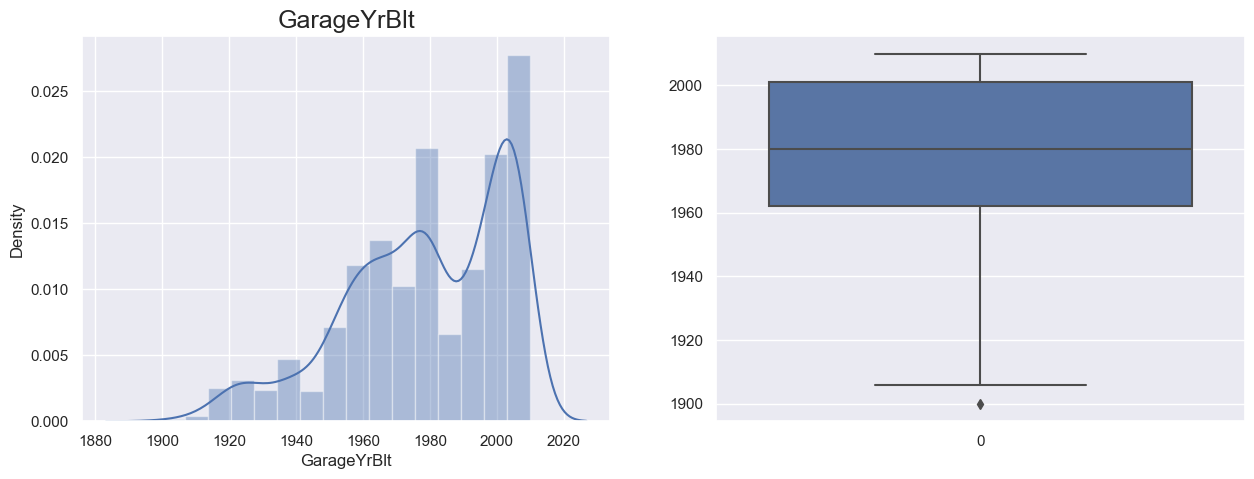

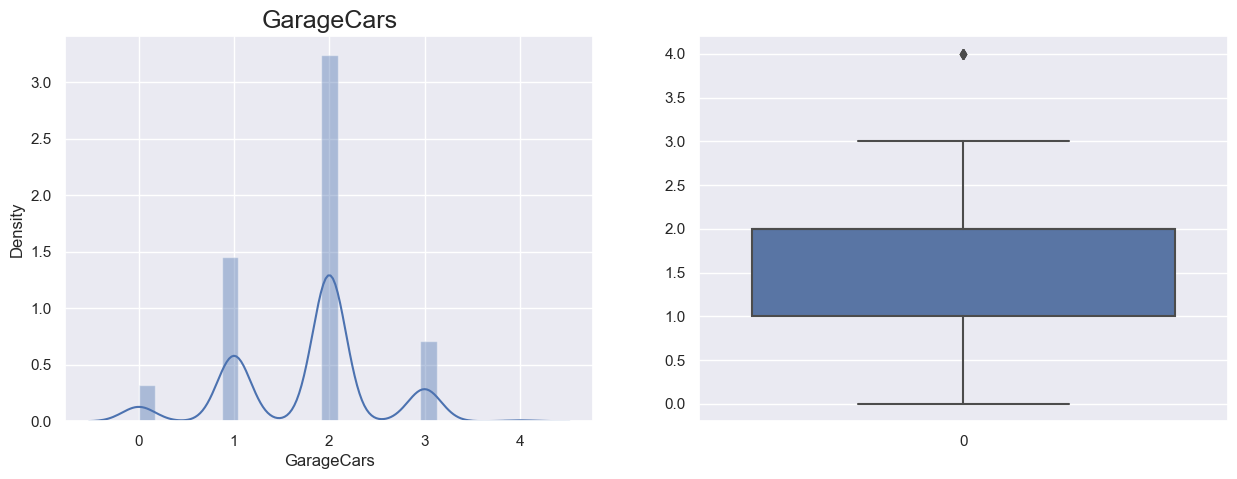

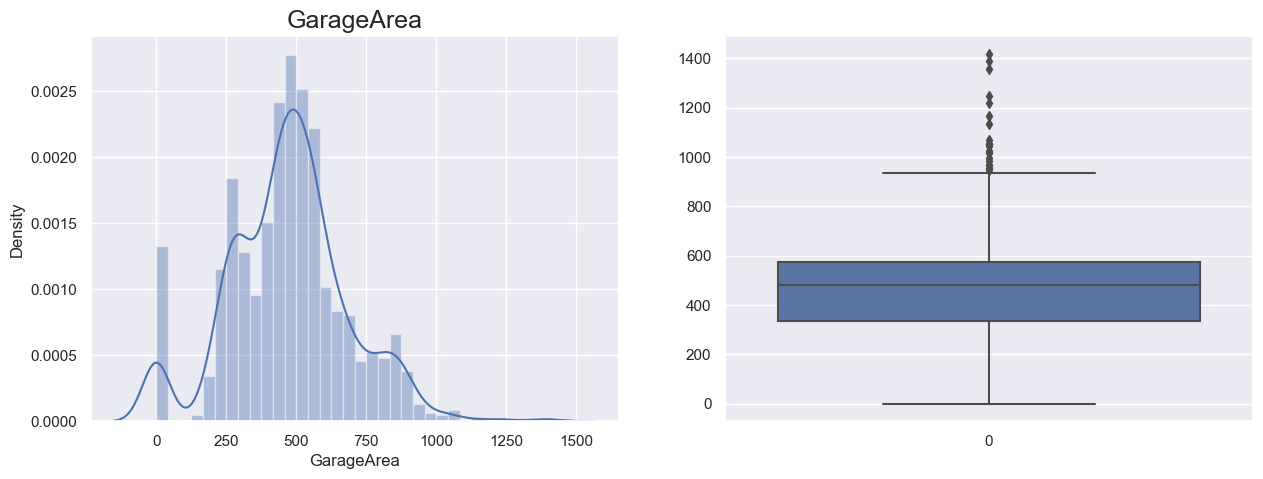

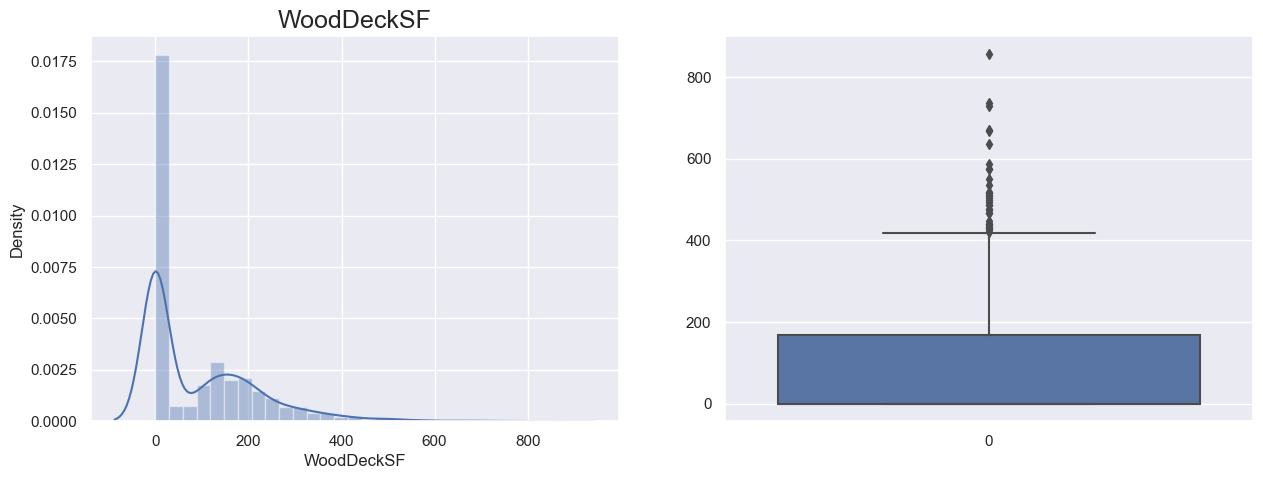

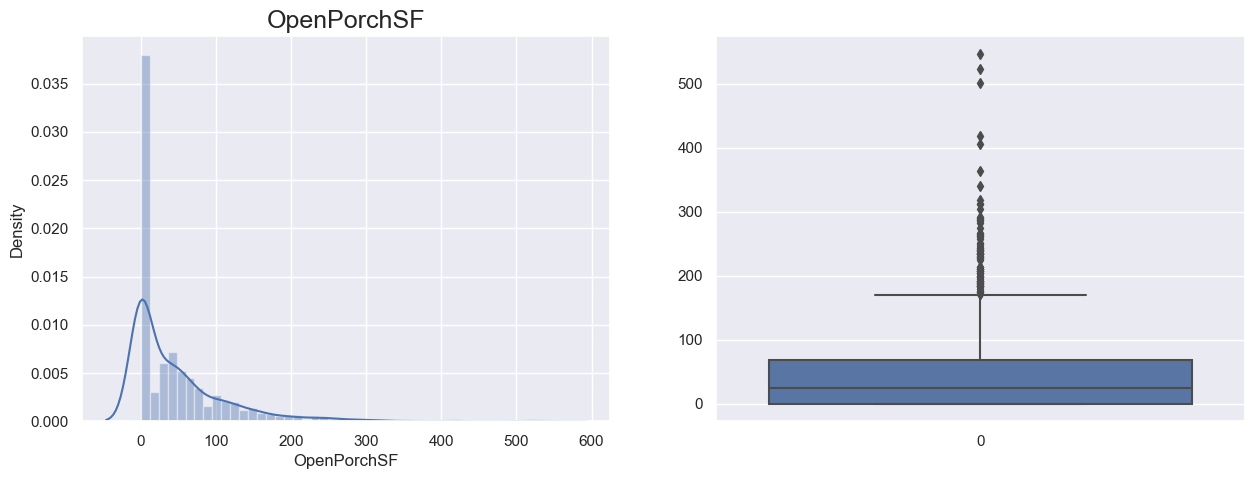

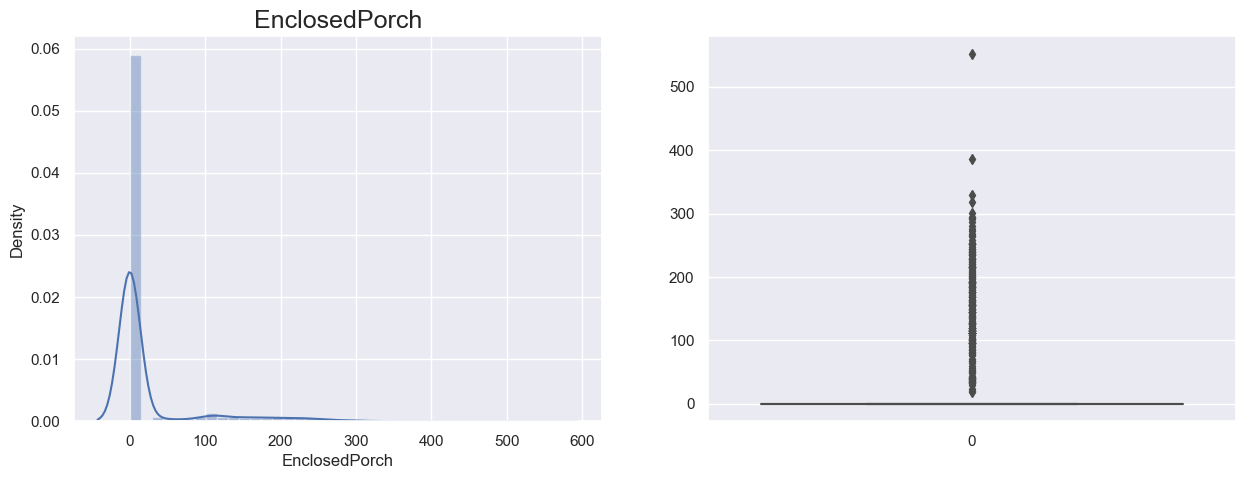

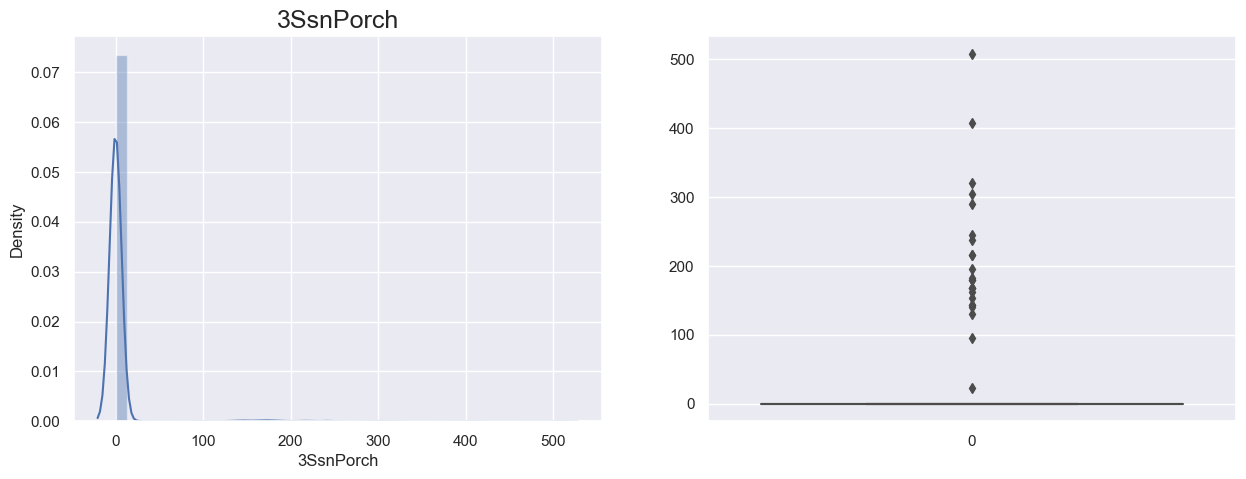

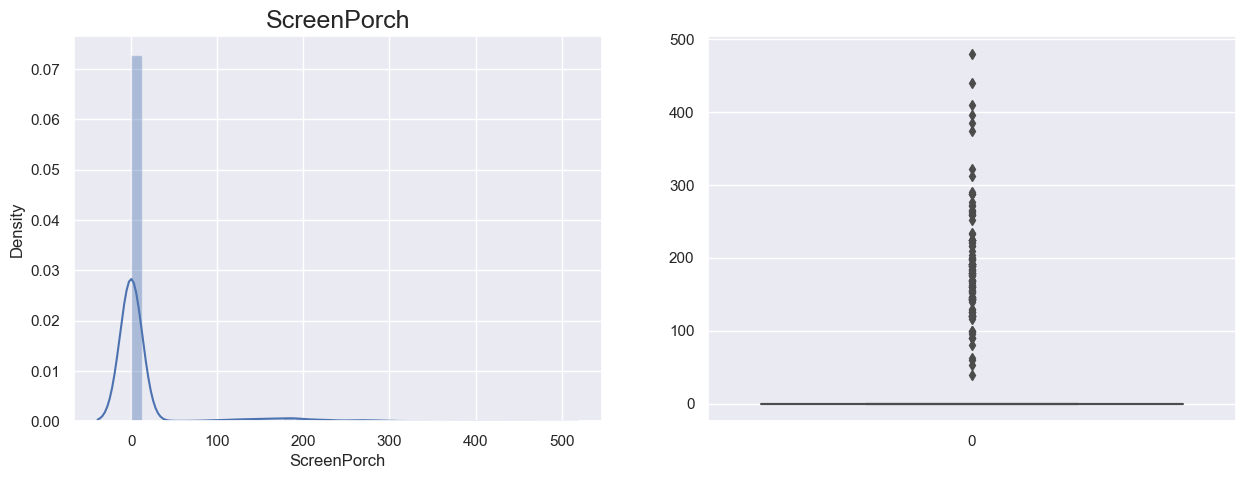

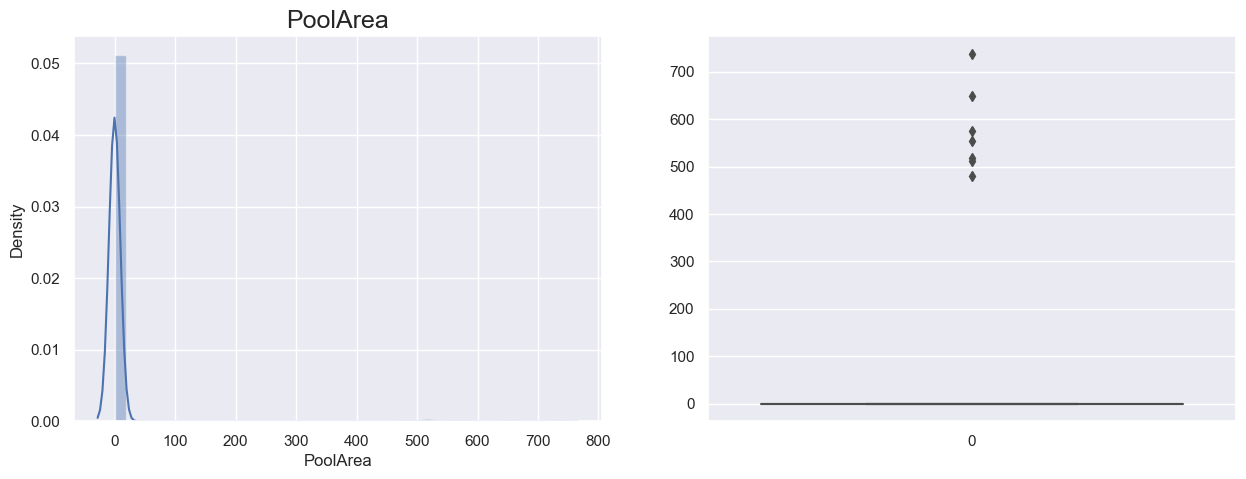

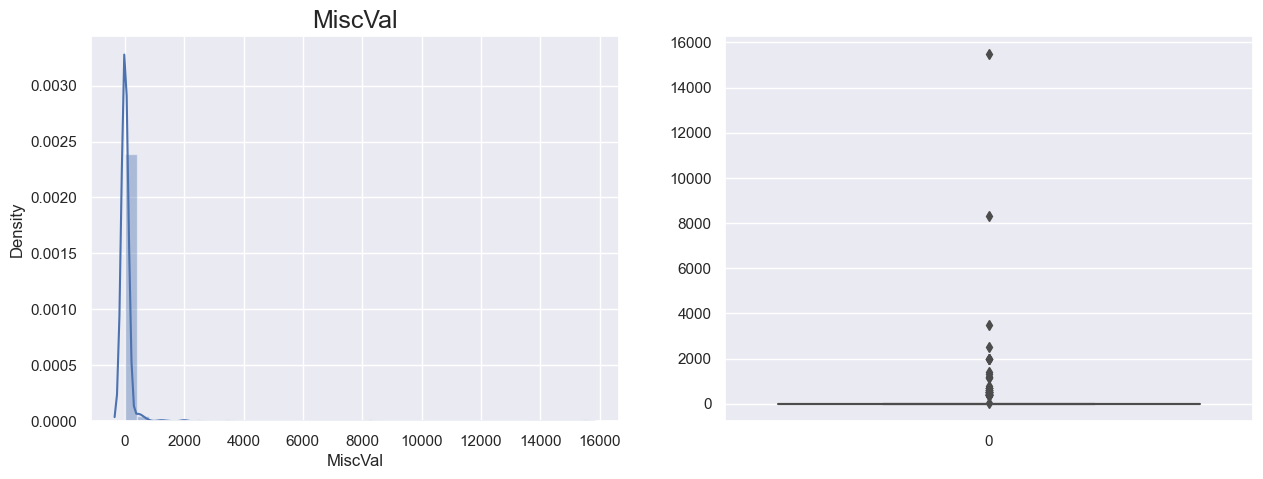

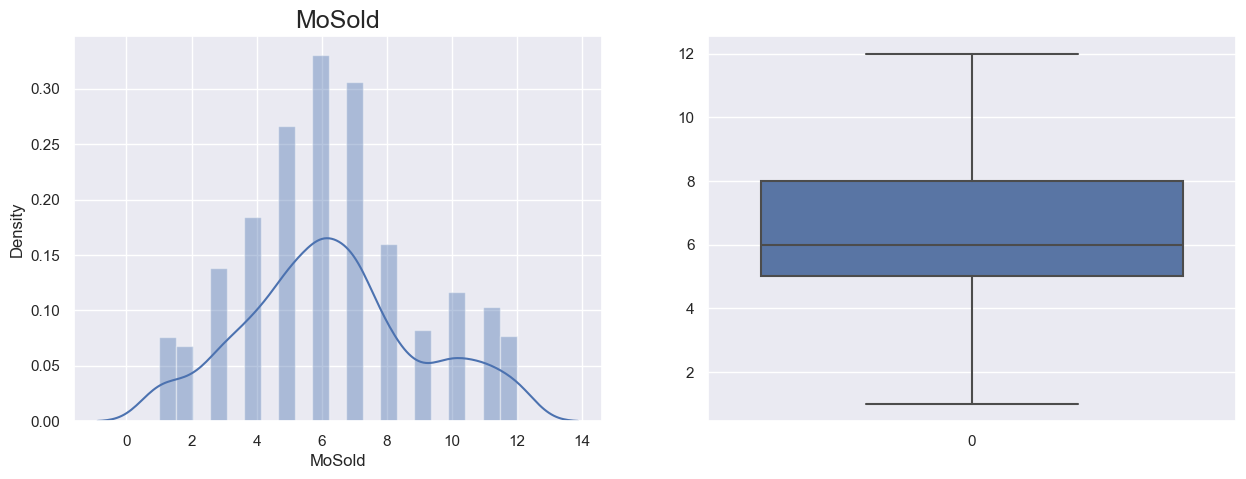

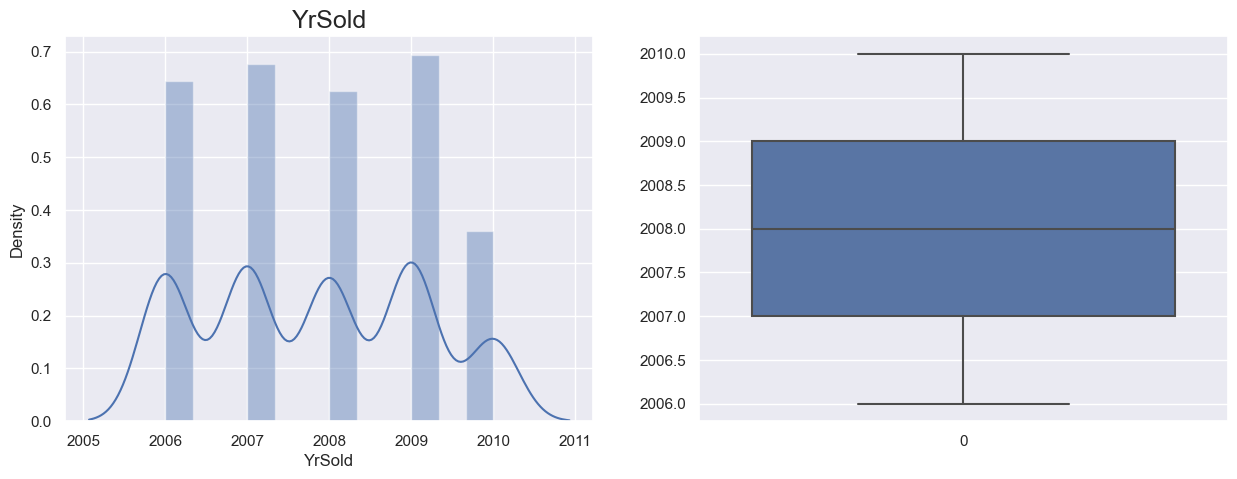

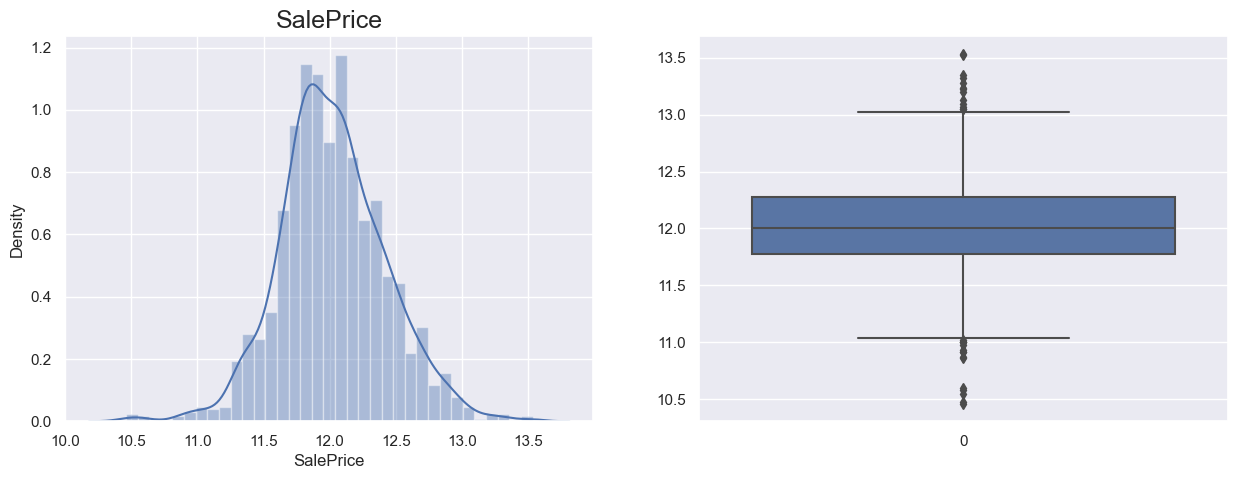

In [479]:
# Check distribution for all numeric columns 

for col in housing_numeric.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_numeric[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_numeric[col])
    plt.show()    

In [480]:
# correlation matrix
cor = housing_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.073959     0.353288  0.257320     0.817184    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

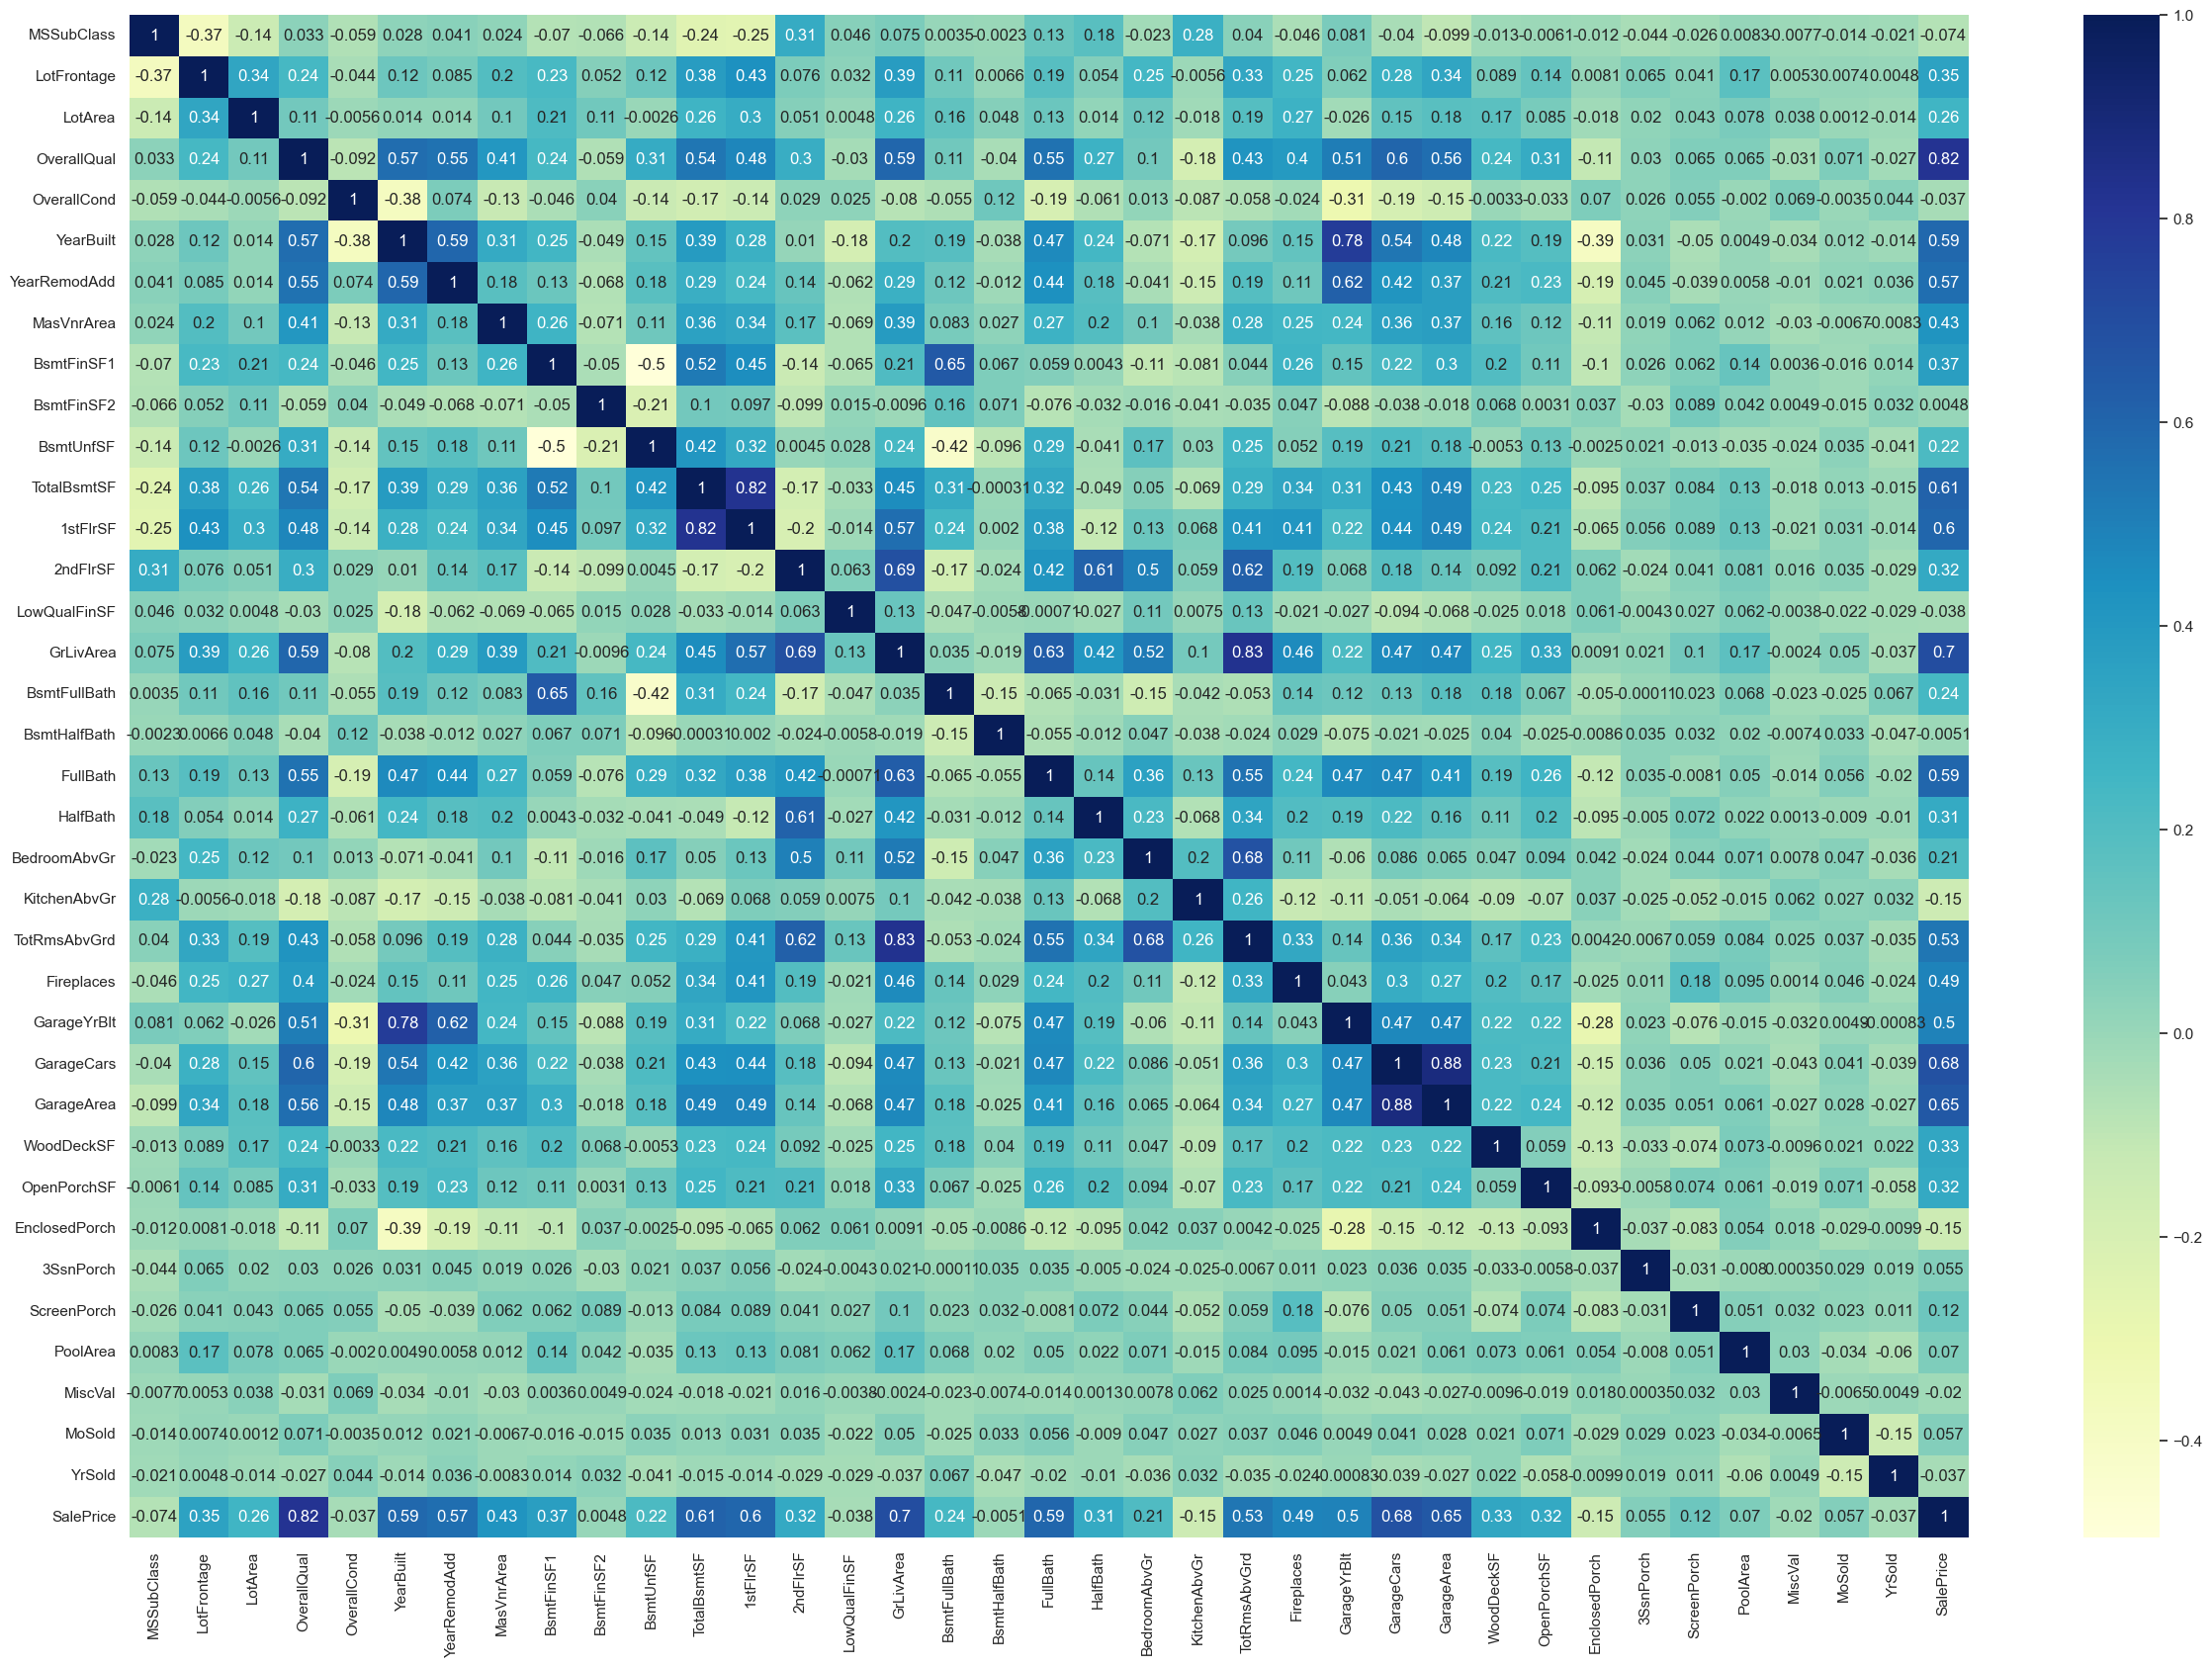

In [481]:

plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [482]:
for col in housing_numeric.columns:
    housing_numeric[col][housing_numeric[col] <= housing_numeric[col].quantile(0.05)] = housing_numeric[col].quantile(0.05)
    housing_numeric[col][housing_numeric[col] >= housing_numeric[col].quantile(0.95)] = housing_numeric[col].quantile(0.95)

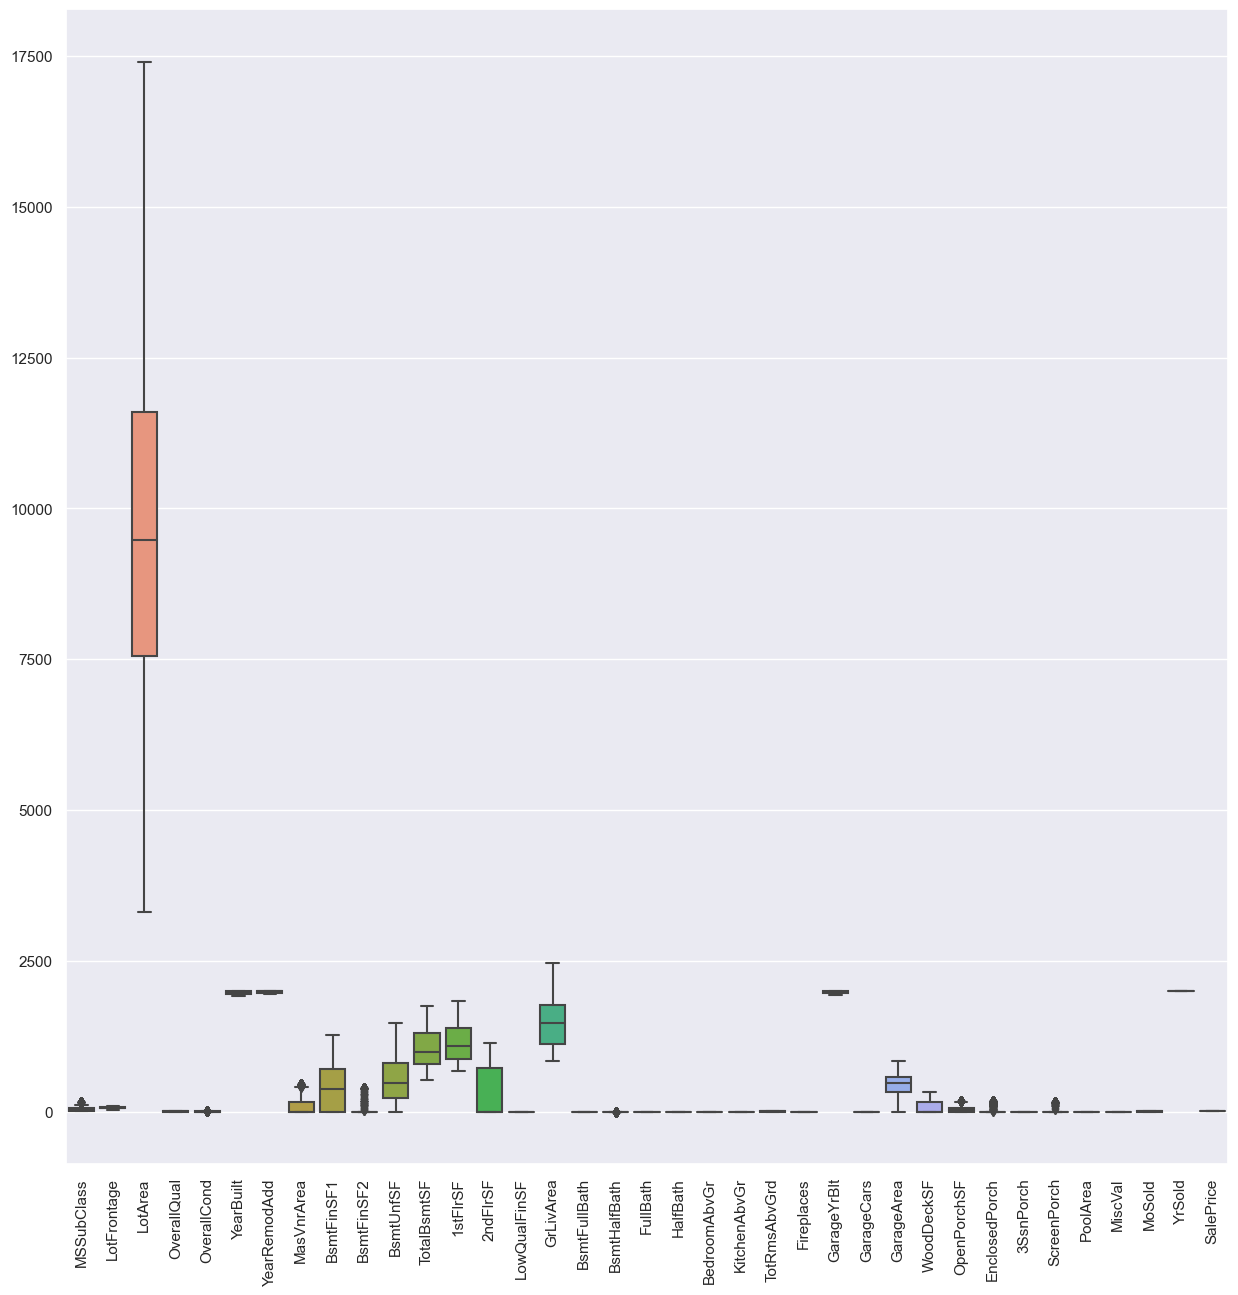

In [483]:
# Outliers 

## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_numeric);

## Clearly few vars are correlated 

- overallquality, year built, TotalBsmtSqft, GRLivArea, FullBath, GarageCars, GarageArea, 1stFlrSF

- We can remove the correlated variables. 



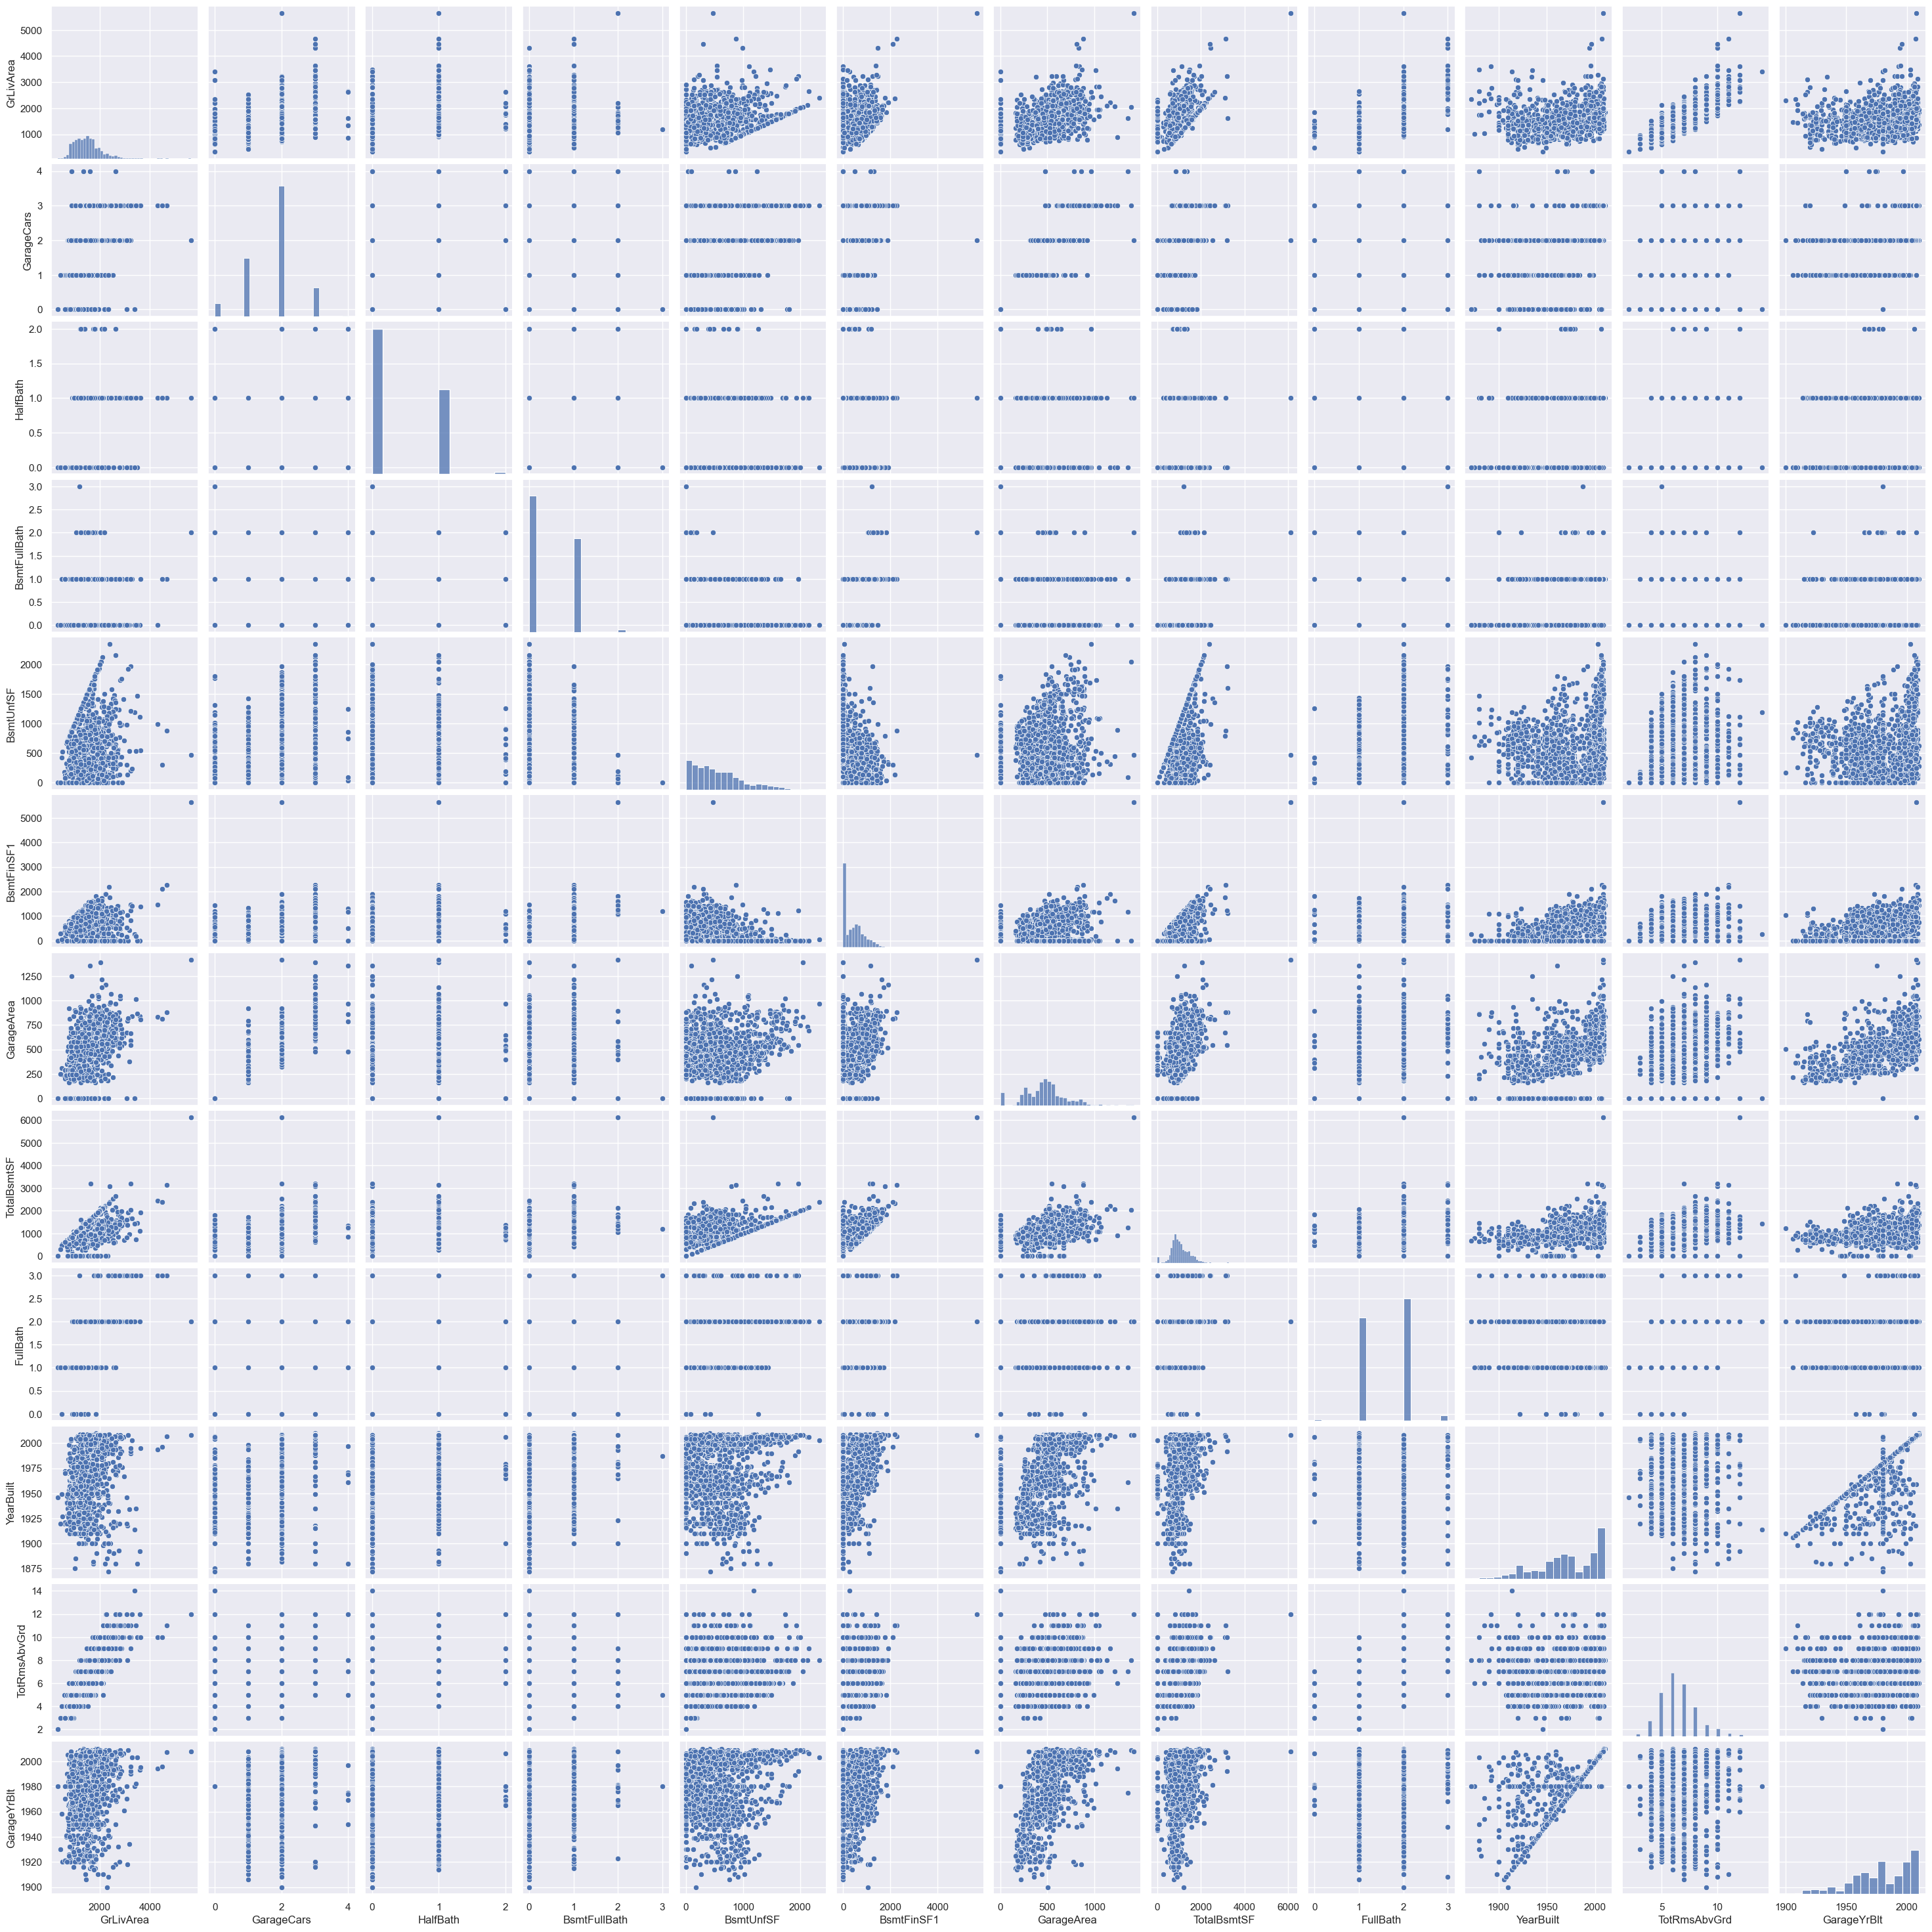

In [484]:
# Checking the same with a pairplot 
sns.set()
cols = ['GrLivArea', 'GarageCars', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'FullBath','YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing[cols])
plt.show()


In [485]:
housing = housing.drop(['MoSold'], axis = 1)
housing = housing.drop(['YrSold'], axis = 1)
housing = housing.drop(['YearBuilt'], axis = 1)
housing = housing.drop(['YearRemodAdd'], axis = 1)
housing= housing.drop(['Id'], axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0   none  none   
1         Lvl    AllPub       FR2  ...           0        0   none  none   
2         Lvl    AllPub    Inside  ...           0        0   none  none   
3         Lvl    AllPub    Corner  ...           0        0   none  none   
4         Lvl    AllPub       FR2  ...           0        0   none  none   

  MiscFeature MiscVal  SaleType  SaleCondition  SalePrice PropAge  
0        none       0        WD         Normal  12.247694       5  
1        none       0        WD         Normal  12.109011      31  
2        none       0        WD         Normal  12.317167       7  
3        none       0        WD        Abnorml  11.849398      91  
4        none       0        WD         Normal  12.429216       8  

[5 rows x 77 columns]

In [486]:
# Dropping as lot of insignificant information from data
housing = housing.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)



In [487]:
# Dropping the columns since they have same kind of values
housing = housing.drop(['Street'], axis = 1)
housing = housing.drop(['Utilities'], axis = 1)

In [488]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [489]:
#type of each feature in dataset int, float, object
types = housing.dtypes
#numerical values have datatype int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [490]:

pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      29
float64     4
Name: 0, dtype: int64

In [491]:
# create a list of numeric variables and categorical variables
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [492]:
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### 3. Data Preparation 

- Lets prepare the data and build the model.




In [493]:
# split into X and y

X=housing.loc[:,['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge','MSZoning', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
                 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 
                 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']]

y= housing['SalePrice']

In [494]:
# Creating Dummy Variables for categorical Variables 
housing_categorical= X.select_dtypes(include=['object'])
housing_categorical.head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr   
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm   
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm   
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm   

  BldgType HouseStyle RoofStyle  ... Electrical KitchenQual FireplaceQu  \
0     1Fam     2Story     Gable  ...      SBrkr          Gd        none   
1     1Fam     1Story     Gable  ...      SBrkr          TA          TA   
2     1Fam     2Story     Gable  ...      SBrkr          Gd          TA   
3     1Fam     2Story     Gable  ...      SBrkr          Gd          Gd   
4     1Fam     2Story     Gable  ...      SBrkr          Gd          TA   

  GarageType GarageFinish GarageQual PavedDrive MiscFeature SaleType  \
0     Attchd          RFn         TA          Y        none       WD   
1     Attchd          RFn         TA          Y        none       WD   
2     Attchd          RFn         TA          Y        none       WD   
3     Detchd          Unf         TA          Y        none       WD   
4     Attchd          RFn         TA          Y        none       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 33 columns]

In [495]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                1  ...               0               0             0   
1                1  ...               0               0             0   
2                1  ...               0               0             0   
3                1  ...               0               0             0   
4                1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 183 columns]

In [496]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [497]:
X=pd.concat([X,housing_dummies],axis=1)

In [498]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=215)

In [499]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [500]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.636078    -0.142688 -0.492374    -0.795151     0.381743   -0.570750   
318     0.073375     0.882989 -0.061820     0.651479    -0.517200    0.846202   
239    -0.163109    -0.811607 -0.177977    -0.071836    -1.416142   -0.570750   
986    -0.163109    -0.499445 -0.521839    -0.071836     2.179628   -0.570750   
1416    3.147673    -0.454850  0.082500    -1.518467     0.381743   -0.570750   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
210     0.053428   -0.288653  -0.387671    -0.441061  ...       -0.058621   
318     1.191731   -0.288653  -0.469172     0.660283  ...       -0.058621   
239    -0.766852   -0.288653   0.166984    -0.735209  ...       -0.058621   
986    -0.973018   -0.288653  -0.186184    -1.305262  ...       -0.058621   
1416   -0.973018   -0.288653   0.474875    -0.639440  ...       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210        -0.058621     -0.301962     -0.045376     0.390293   
318        -0.058621     -0.301962     -0.045376     0.390293   
239        -0.058621     -0.301962     -0.045376     0.390293   
986        -0.058621     -0.301962     -0.045376     0.390293   
1416       -0.058621     -0.301962     -0.045376     0.390293   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210               -0.052414             -0.091035             -0.117851   
318               -0.052414             -0.091035             -0.117851   
239               -0.052414             -0.091035             -0.117851   
986               -0.052414             -0.091035             -0.117851   
1416              -0.052414             -0.091035             -0.117851   

      SaleCondition_Normal  SaleCondition_Partial  
210               0.467651              -0.305995  
318               0.467651              -0.305995  
239               0.467651              -0.305995  
986               0.467651              -0.305995  
1416              0.467651              -0.305995  

[5 rows x 215 columns]

In [501]:
X_train.shape

(1021, 215)

In [502]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [503]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.636078    -0.142688 -0.492374    -0.795151     0.381743   -0.570750   
318     0.073375     0.882989 -0.061820     0.651479    -0.517200    0.846202   
239    -0.163109    -0.811607 -0.177977    -0.071836    -1.416142   -0.570750   
986    -0.163109    -0.499445 -0.521839    -0.071836     2.179628   -0.570750   
1416    3.147673    -0.454850  0.082500    -1.518467     0.381743   -0.570750   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
210     0.053428   -0.288653  -0.387671    -0.441061  ...       -0.058621   
318     1.191731   -0.288653  -0.469172     0.660283  ...       -0.058621   
239    -0.766852   -0.288653   0.166984    -0.735209  ...       -0.058621   
986    -0.973018   -0.288653  -0.186184    -1.305262  ...       -0.058621   
1416   -0.973018   -0.288653   0.474875    -0.639440  ...       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210        -0.058621     -0.301962     -0.045376     0.390293   
318        -0.058621     -0.301962     -0.045376     0.390293   
239        -0.058621     -0.301962     -0.045376     0.390293   
986        -0.058621     -0.301962     -0.045376     0.390293   
1416       -0.058621     -0.301962     -0.045376     0.390293   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210               -0.052414             -0.091035             -0.117851   
318               -0.052414             -0.091035             -0.117851   
239               -0.052414             -0.091035             -0.117851   
986               -0.052414             -0.091035             -0.117851   
1416              -0.052414             -0.091035             -0.117851   

      SaleCondition_Normal  SaleCondition_Partial  
210               0.467651              -0.305995  
318               0.467651              -0.305995  
239               0.467651              -0.305995  
986               0.467651              -0.305995  
1416              0.467651              -0.305995  

[5 rows x 215 columns]

In [504]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1436   -0.872563    -0.454850 -0.152020    -1.518467     0.381743   -0.570750   
57      0.073375     0.838395  0.113068     0.651479    -0.517200   -0.570750   
780    -0.872563    -0.321066 -0.264769     0.651479    -0.517200   -0.360421   
382     0.073375     0.392448 -0.127465     0.651479    -0.517200   -0.570750   
1170    0.546344     0.258664 -0.063824    -0.071836     0.381743   -0.570750   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
1436    0.378031   -0.288653  -0.722728    -0.441061  ...       -0.058621   
57     -0.973018   -0.288653   0.662778    -0.450182  ...       -0.058621   
780    -0.973018   -0.288653   1.516269     0.409460  ...       -0.058621   
382    -0.973018   -0.288653   0.841627    -0.270045  ...       -0.058621   
1170    0.171865   -0.288653   0.015303     0.087949  ...       -0.058621   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436       -0.058621     -0.301962     -0.045376     0.390293   
57         -0.058621     -0.301962     -0.045376     0.390293   
780        -0.058621     -0.301962     -0.045376     0.390293   
382        -0.058621     -0.301962     -0.045376     0.390293   
1170       -0.058621     -0.301962     -0.045376     0.390293   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436              -0.052414             -0.091035             -0.117851   
57                -0.052414             -0.091035             -0.117851   
780               -0.052414             -0.091035             -0.117851   
382               -0.052414             -0.091035             -0.117851   
1170              -0.052414             -0.091035             -0.117851   

      SaleCondition_Normal  SaleCondition_Partial  
1436              0.467651              -0.305995  
57                0.467651              -0.305995  
780               0.467651              -0.305995  
382               0.467651              -0.305995  
1170              0.467651              -0.305995  

[5 rows x 215 columns]

## 3 Model Building and evaluation

### Linear Regression


In [505]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [506]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-49910622.79111661
[-1.73005259e-02 -1.64801291e-02  2.34877386e-02  6.47266514e-02
  4.21607495e-02 -6.01058694e-03  4.06105403e+10  1.43637146e+10
  3.93434135e+10 -3.90619049e+10  2.34767485e+10  2.65095535e+10
  2.95278857e+09 -3.19114385e+10  2.63550282e-02  4.15325165e-03
  1.81188583e-02  1.31001472e-02  1.71499252e-02 -1.06739998e-02
  1.39350891e-02 -1.05972290e-02 -6.28232956e-03  4.72688675e-02
  4.05693054e-03  1.29120350e-02 -1.01566315e-03  9.24873352e-03
  8.89468193e-03  1.14187598e-02 -1.05018616e-02 -2.62975693e-02
  8.57722759e-02  4.59315777e-02  1.71186447e-01  1.38198853e-01
  5.04970551e-03 -4.34350967e-03  6.00624084e-03  1.55872107e-02
  1.66904926e-02  2.94847488e-02  6.77871704e-03 -1.16763115e-02
 -3.88240814e-03 -6.29711151e-03  4.99111414e-03 -7.86185265e-03
  2.74181366e-06 -1.92546844e-03  1.14865303e-02  1.96833611e-02
  1.92461014e-02  3.92537117e-02 -1.25007629e-02  1.28867626e-02
  1.95908546e-03 -1.25694275e-02  2.95674801e-03  1.47565603e-02
 -1.75

In [507]:
from sklearn.metrics import r2_score, mean_squared_error

In [508]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9277065198027704
-3.527001256852267e+20
11.602542740480214
2.5418594063504657e+22
0.011363900823193157
5.8033319779690996e+19


In [509]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9277065198027704

In [510]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-3.527001256852267e+20

### Linear Regresssion giving very low Rsquare for test data.

- Trying regularized L1/L2  Lasso and Ridge Regression




## Ridge and Lasso Regression

### Ridge



In [586]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [587]:
X_test.shape

(438, 215)

In [588]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [589]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007398      0.002797         0.002601    4.883891e-04      0.0001   
1       0.006400      0.000490         0.003000    8.609519e-07       0.001   
2       0.006198      0.000401         0.002802    4.009843e-04        0.01   
3       0.006114      0.000232         0.002817    3.662828e-04        0.05   
4       0.005691      0.000358         0.002300    3.371909e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.105101          -0.098642          -0.106257   
1   {'alpha': 0.001}          -0.105101          -0.098642          -0.106256   
2    {'alpha': 0.01}          -0.105099          -0.098640          -0.106249   
3    {'alpha': 0.05}          -0.105088          -0.098629          -0.106218   
4     {'alpha': 0.1}          -0.105076          -0.098615          -0.106180   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.095058  ...        -0.102173        0.004507               27   
1          -0.095054  ...        -0.102172        0.004507               26   
2          -0.095017  ...        -0.102159        0.004515               25   
3          -0.094857  ...        -0.102103        0.004550               24   
4          -0.094663  ...        -0.102034        0.004592               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.074524           -0.064818           -0.069048   
1           -0.074524           -0.064818           -0.069048   
2           -0.074521           -0.064818           -0.069048   
3           -0.074512           -0.064817           -0.069045   
4           -0.074501           -0.064817           -0.069041   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.076992           -0.075163         -0.072109         0.004506  
1           -0.076992           -0.075163         -0.072109         0.004506  
2           -0.076991           -0.075164         -0.072108         0.004506  
3           -0.076986           -0.075165         -0.072105         0.004505  
4           -0.076981           -0.075167         -0.072102         0.004503  

[5 rows x 21 columns]

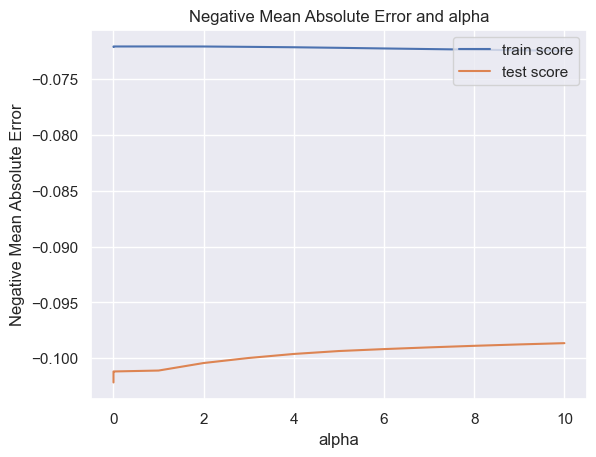

In [590]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [591]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.60197612e-02 -1.49776346e-02  2.23348309e-02  6.59148657e-02
  4.31746262e-02 -4.83871048e-03 -3.20203992e-03  5.77555682e-03
  6.51892733e-03  5.36068922e-03  3.31434151e-02  4.04720111e-02
  1.36485680e-03  5.81304005e-02  2.63760279e-02  3.43204308e-03
  2.00322445e-02  1.47723855e-02  1.67615344e-02 -1.19094166e-02
  1.44394108e-02 -6.15099514e-03 -6.38596591e-03  4.34037381e-02
  6.45874680e-03  1.31119272e-02 -1.92769661e-04  8.24565006e-03
  8.59017918e-03  1.12094858e-02 -1.06597094e-02 -2.48278527e-02
  4.51852390e-02  2.66347344e-02  9.28684735e-02  7.50637126e-02
  4.89369985e-03 -4.97060213e-03  5.16705352e-03  1.46374477e-02
  1.42039107e-02  2.68064773e-02  7.00939615e-03 -1.14621668e-02
 -4.52562533e-03 -6.03578483e-03  4.30484399e-03 -7.00217030e-03
 -1.65103023e-03 -6.83370278e-03  1.31188449e-03  1.50439336e-02
  7.74942364e-03  3.11239081e-02 -2.17082662e-02  4.34826224e-03
 -1.13270767e-02 -1.73146036e-02 -3.37369511e-03  1.03177435e-03
 -3.25721377e-03  1.25047

In [592]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9264233520470897
0.881347271817443
11.80848121083569
8.551132570027615
0.011565603536567768
0.019523133721524234


## Lasso


In [593]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [594]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [595]:
#Fitting Ridge model for alpha = .001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [596]:
lasso.coef_

array([-2.14858115e-02, -9.93548507e-03,  1.84151177e-02,  7.11306116e-02,
        4.46310356e-02, -2.11335552e-03, -0.00000000e+00,  1.44241113e-03,
        4.87967699e-03,  3.55857561e-03,  2.64773500e-03,  0.00000000e+00,
       -1.82449632e-03,  1.07181803e-01,  2.78352544e-02,  2.14396766e-03,
        1.71203094e-02,  1.21700898e-02,  1.39224176e-02, -8.50482996e-03,
        1.27091413e-02, -0.00000000e+00, -0.00000000e+00,  4.50648740e-02,
        0.00000000e+00,  1.16296888e-02, -0.00000000e+00,  5.75268280e-03,
        6.93431492e-03,  9.69033780e-03, -1.17101742e-02, -3.42323322e-02,
        3.20433942e-02,  2.00569042e-02,  7.18122674e-02,  5.06467466e-02,
        3.88559543e-03, -5.56431134e-03,  2.38149841e-03,  1.17165793e-02,
        1.19120938e-02,  2.18572837e-02,  6.92852672e-03, -7.88287504e-03,
       -2.47678872e-03, -2.83551883e-03,  3.01659455e-03, -2.52294623e-03,
       -0.00000000e+00, -4.80077535e-03,  0.00000000e+00,  1.30856558e-02,
        2.45316859e-03,  

In [597]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9225572037771554
0.8856069584549762
12.428968015739365
8.24414304098553
0.012173328125112012
0.018822244385811714


In [598]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.277065e-01          0.926423          0.922557
1   R2 Score (Test)      -3.527001e+20          0.881347          0.885607
2       RSS (Train)       1.160254e+01         11.808481         12.428968
3        RSS (Test)       2.541859e+22          8.551133          8.244143
4       MSE (Train)       1.066016e-01          0.107543          0.110333
5        MSE (Test)       7.617960e+09          0.139725          0.137194

## Lets observe the changes in the coefficients after regularization

In [599]:
betas = pd.DataFrame(index=X.columns)

In [600]:
betas.rows = X.columns

In [601]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [602]:
pd.set_option('display.max_rows', None)
betas.head(100)

Linear     Ridge     Lasso
MSSubClass           -1.730053e-02 -0.016020 -0.021486
LotFrontage          -1.648013e-02 -0.014978 -0.009935
LotArea               2.348774e-02  0.022335  0.018415
OverallQual           6.472665e-02  0.065915  0.071131
OverallCond           4.216075e-02  0.043175  0.044631
MasVnrArea           -6.010587e-03 -0.004839 -0.002113
BsmtFinSF1            4.061054e+10 -0.003202 -0.000000
BsmtFinSF2            1.436371e+10  0.005776  0.001442
BsmtUnfSF             3.934341e+10  0.006519  0.004880
TotalBsmtSF          -3.906190e+10  0.005361  0.003559
1stFlrSF              2.347675e+10  0.033143  0.002648
2ndFlrSF              2.650955e+10  0.040472  0.000000
LowQualFinSF          2.952789e+09  0.001365 -0.001824
GrLivArea            -3.191144e+10  0.058130  0.107182
BsmtFullBath          2.635503e-02  0.026376  0.027835
BsmtHalfBath          4.153252e-03  0.003432  0.002144
FullBath              1.811886e-02  0.020032  0.017120
HalfBath              1.310015e-02  0.014772  0.012170
BedroomAbvGr          1.714993e-02  0.016762  0.013922
KitchenAbvGr         -1.067400e-02 -0.011909 -0.008505
TotRmsAbvGrd          1.393509e-02  0.014439  0.012709
Fireplaces           -1.059723e-02 -0.006151 -0.000000
GarageYrBlt          -6.282330e-03 -0.006386 -0.000000
GarageCars            4.726887e-02  0.043404  0.045065
GarageArea            4.056931e-03  0.006459  0.000000
WoodDeckSF            1.291203e-02  0.013112  0.011630
OpenPorchSF          -1.015663e-03 -0.000193 -0.000000
EnclosedPorch         9.248734e-03  0.008246  0.005753
3SsnPorch             8.894682e-03  0.008590  0.006934
ScreenPorch           1.141876e-02  0.011209  0.009690
PoolArea             -1.050186e-02 -0.010660 -0.011710
PropAge              -2.629757e-02 -0.024828 -0.034232
MSZoning_FV           8.577228e-02  0.045185  0.032043
MSZoning_RH           4.593158e-02  0.026635  0.020057
MSZoning_RL           1.711864e-01  0.092868  0.071812
MSZoning_RM           1.381989e-01  0.075064  0.050647
LotShape_IR2          5.049706e-03  0.004894  0.003886
LotShape_IR3         -4.343510e-03 -0.004971 -0.005564
LotShape_Reg          6.006241e-03  0.005167  0.002381
LandContour_HLS       1.558721e-02  0.014637  0.011717
LandContour_Low       1.669049e-02  0.014204  0.011912
LandContour_Lvl       2.948475e-02  0.026806  0.021857
LotConfig_CulDSac     6.778717e-03  0.007009  0.006929
LotConfig_FR2        -1.167631e-02 -0.011462 -0.007883
LotConfig_FR3        -3.882408e-03 -0.004526 -0.002477
LotConfig_Inside     -6.297112e-03 -0.006036 -0.002836
LandSlope_Mod         4.991114e-03  0.004305  0.003017
LandSlope_Sev        -7.861853e-03 -0.007002 -0.002523
Neighborhood_Blueste  2.741814e-06 -0.001651 -0.000000
Neighborhood_BrDale  -1.925468e-03 -0.006834 -0.004801
Neighborhood_BrkSide  1.148653e-02  0.001312  0.000000
Neighborhood_ClearCr  1.968336e-02  0.015044  0.013086
Neighborhood_CollgCr  1.924610e-02  0.007749  0.002453
Neighborhood_Crawfor  3.925371e-02  0.031124  0.028291
Neighborhood_Edwards -1.250076e-02 -0.021708 -0.021065
Neighborhood_Gilbert  1.288676e-02  0.004348 -0.000000
Neighborhood_IDOTRR   1.959085e-03 -0.011327 -0.011177
Neighborhood_MeadowV -1.256943e-02 -0.017315 -0.012760
Neighborhood_Mitchel  2.956748e-03 -0.003374 -0.002079
Neighborhood_NAmes    1.475656e-02  0.001032 -0.001229
Neighborhood_NPkVill -1.759529e-03 -0.003257 -0.001381
Neighborhood_NWAmes   9.325027e-03  0.001250  0.000000
Neighborhood_NoRidge  2.634239e-02  0.020374  0.016078
Neighborhood_NridgHt  4.474068e-02  0.037209  0.031903
Neighborhood_OldTown  7.182360e-03 -0.007901 -0.005972
Neighborhood_SWISU    1.001310e-02  0.004630  0.002660
Neighborhood_Sawyer   5.551696e-03 -0.002774 -0.002487
Neighborhood_SawyerW  1.316261e-02  0.005780  0.001636
Neighborhood_Somerst  3.965044e-02  0.031898  0.028879
Neighborhood_StoneBr  2.431107e-02  0.020572  0.017198
Neighborhood_Timber   8.099556e-03  0.003102  0.000688
Neighborhood_Veenker  1.194048e-02  0.008826  0.007324
Condition1_Fe

In [603]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

MSZoning_RL             0.092868
MSZoning_RM             0.075064
OverallQual             0.065915
GrLivArea               0.058130
MSZoning_FV             0.045185
GarageCars              0.043404
OverallCond             0.043175
2ndFlrSF                0.040472
Neighborhood_NridgHt    0.037209
1stFlrSF                0.033143
Name: Ridge, dtype: float64

In [604]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.107182
MSZoning_RL             0.071812
OverallQual             0.071131
MSZoning_RM             0.050647
GarageCars              0.045065
OverallCond             0.044631
MSZoning_FV             0.032043
Neighborhood_NridgHt    0.031903
Neighborhood_Somerst    0.028879
Neighborhood_Crawfor    0.028291
Name: Lasso, dtype: float64

## Variables that are significant for predicting housing prices are


-     GrLivArea,OverallQual,GarageCars,OverallCond,BsmtFullBath,TotalBsmtSF,Neighborhood_NridgHt,CentralAir_Y,Neighborhood_Crawfor,Condition1_Norm,MSZoning_RL,OverallQual,MSZoning_RM,MSZoning_FV,Neighborhood_Somerst 
        
   

### Optimal Values for Lasso regression = 0.001 and Ridge regression = 10 . 



### Now changing the alpha value to double to see how it effects the coefficients. 


In [621]:
#Fitting lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [622]:
lasso.coef_

array([-2.28012683e-02, -4.75923972e-03,  1.54982644e-02,  7.94647671e-02,
        4.54045513e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.38221561e-04,  9.40959848e-03,  7.51106461e-03,  0.00000000e+00,
       -5.10323723e-04,  9.98227168e-02,  2.80233588e-02,  3.41785457e-04,
        1.56558840e-02,  1.04395372e-02,  1.07862601e-02, -6.72323777e-03,
        1.46910399e-02,  0.00000000e+00,  0.00000000e+00,  4.38367802e-02,
        0.00000000e+00,  1.12662419e-02, -0.00000000e+00,  3.36780462e-03,
        5.31496973e-03,  8.50917983e-03, -1.18929631e-02, -4.04187946e-02,
        1.69353739e-03,  4.81127740e-03,  1.55615259e-02,  0.00000000e+00,
        3.22833445e-03, -6.68791078e-03,  0.00000000e+00,  7.82023488e-03,
        7.99186106e-03,  1.54361547e-02,  7.39427242e-03, -4.67366726e-03,
       -1.05830582e-03, -0.00000000e+00,  1.71829352e-03, -0.00000000e+00,
       -0.00000000e+00, -3.85122582e-03,  0.00000000e+00,  1.21529205e-02,
        3.69047399e-04,  

In [623]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9151698853939305
0.8845109503241115
13.614575307642667
8.32313078082437
0.01333454976262749
0.01900258169137984


## Ridge after doubling the alpha 

In [624]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.56247817e-02 -1.39653275e-02  2.15307348e-02  6.55414467e-02
  4.29879125e-02 -4.12914163e-03 -2.13826302e-03  6.00768138e-03
  6.69274847e-03  6.72707017e-03  3.23131174e-02  3.81099526e-02
  1.15734270e-03  5.55381466e-02  2.60699515e-02  3.18946837e-03
  2.08238925e-02  1.54676625e-02  1.63052041e-02 -1.23477605e-02
  1.58293299e-02 -3.33339498e-03 -5.70932105e-03  4.08748069e-02
  8.24991877e-03  1.31793055e-02 -2.06205780e-05  7.59601656e-03
  8.44914545e-03  1.09563889e-02 -1.06175315e-02 -2.42243970e-02
  3.10083052e-02  1.96256727e-02  6.48061612e-02  5.15745270e-02
  4.74321710e-03 -5.39640441e-03  4.78884611e-03  1.39447430e-02
  1.31377867e-02  2.52034661e-02  7.22056762e-03 -1.11398839e-02
 -4.69112064e-03 -5.80054875e-03  4.05549589e-03 -6.57184580e-03
 -2.01700147e-03 -7.96519929e-03 -9.46503752e-04  1.38790990e-02
  4.70835243e-03  2.89393997e-02 -2.34847261e-02  2.10515797e-03
 -1.48549001e-02 -1.82229791e-02 -4.53264694e-03 -1.95167331e-03
 -3.28461199e-03 -4.30218

In [625]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9251791708153589
0.8817210166996713
12.008162646542967
8.524197310432186
0.011761177910424062
0.019461637695050653


In [626]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.925179          0.915170
1   R2 Score (Test)          0.881721          0.884511
2       RSS (Train)         12.008163         13.614575
3        RSS (Test)          8.524197          8.323131
4       MSE (Train)          0.108449          0.115475
5        MSE (Test)          0.139505          0.137850

In [627]:
betas = pd.DataFrame(index=X.columns)

In [628]:
betas.rows = X.columns

In [629]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [630]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual             0.065541
MSZoning_RL             0.064806
GrLivArea               0.055538
MSZoning_RM             0.051575
OverallCond             0.042988
GarageCars              0.040875
2ndFlrSF                0.038110
Neighborhood_NridgHt    0.035017
1stFlrSF                0.032313
MSZoning_FV             0.031008
Name: Ridge, dtype: float64

In [631]:
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.099823
OverallQual             0.079465
OverallCond             0.045405
GarageCars              0.043837
Neighborhood_NridgHt    0.030023
BsmtFullBath            0.028023
Neighborhood_Somerst    0.027694
Neighborhood_Crawfor    0.026968
Condition1_Norm         0.022199
SaleType_New            0.019073
Name: Lasso, dtype: float64

In [632]:
# Dropping the top 5 predictors and discovering new variables. 

drop_vars=['MSZoning_RL','MSZoning_RM','OverallQual','GrLivArea','MSZoning_FV']


In [633]:
X_train_d= X_train.drop(drop_vars, axis=1)
X_test_d = X_test.drop(drop_vars, axis=1)

In [651]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_d, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [652]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [654]:
#Fitting lasso model for alpha = .001 after dropping the 5 top features and printing coefficients which have been penalised
alpha = .001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_d, y_train)
print(lasso.coef_)

[-1.89683060e-02 -1.30579051e-02  1.87970676e-02  5.26665913e-02
 -1.06294124e-03 -0.00000000e+00  2.63443721e-03  8.87163081e-03
  8.58489465e-03  9.10413774e-02  9.58024821e-02  5.10379285e-03
  2.52197742e-02  5.18220127e-04  2.05041586e-02  1.29645567e-02
  1.14547070e-02 -1.54082369e-02  1.57545994e-02  0.00000000e+00
 -0.00000000e+00  4.50332153e-02  1.68727035e-03  1.10729394e-02
  0.00000000e+00  7.09874191e-03  7.27686623e-03  1.06161334e-02
 -1.02214875e-02 -4.47215287e-02  3.65118710e-03  3.65559254e-03
 -6.59609207e-03  4.33990689e-03  1.29858945e-02  1.18657059e-02
  1.97923957e-02  6.17002033e-03 -9.39717447e-03 -4.58823334e-03
 -4.11657384e-03  0.00000000e+00 -3.17409123e-03 -1.28178635e-03
 -3.61191256e-03 -1.85658931e-03  1.10187977e-02  3.67328507e-03
  2.96081301e-02 -2.61421494e-02 -0.00000000e+00 -2.08815344e-02
 -2.20170818e-02 -2.74737835e-03 -0.00000000e+00  0.00000000e+00
  1.31818524e-03  1.89986344e-02  3.93401942e-02 -1.39040550e-02
  3.15821279e-03 -5.82530

In [655]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_d)
y_pred_test = lasso.predict(X_test_d)

metriclasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metriclasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metriclasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metriclasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metriclasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metriclasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metriclasso.append(mse_test_lr**0.5)

0.9145038293839214
0.8713072777882814
13.721472130186019
9.274700592952074
0.013439247923786502
0.021175115509023002


# R2 Score (Train ) and R2 Score (Test) reduced a bit,  Calculated metrics below

In [663]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

#rg_metric = pd.Series(metric5, name = 'Ridge Regression')
ls_metric = pd.Series(metriclasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,  ls_metric], axis = 1)

final_metric

Metric  Lasso Regression
0  R2 Score (Train)          0.914504
1   R2 Score (Test)          0.871307
2       RSS (Train)         13.721472
3        RSS (Test)          9.274701
4       MSE (Train)          0.115928
5        MSE (Test)          0.145517

In [657]:
betas = pd.DataFrame(index=X_train_d.columns)
betas.rows = X_train_d.columns
betas

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, OverallCond, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PropAge, MSZoning_RH, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, RoofStyle_Gable, RoofStyle_Gambrel, RoofStyle_Hip, RoofStyle_Mansard, RoofStyle_Shed, Exterior1st_AsphShn, Exterior1st_BrkComm, Exterior1st_BrkFace, Exterior1st_CBlock, Exterior1st_CemntBd, Exterior1st_HdBoard, Exterior1st_ImStucc, Exterior1st_MetalSd, Exterior1st_Plywood, ...]

In [658]:
betas.head()

Empty DataFrame
Columns: []
Index: [MSSubClass, LotFrontage, LotArea, OverallCond, MasVnrArea]

In [659]:
betas['Lasso'] = lasso.coef_

In [660]:
# getting top 10 predictor variables. 
betas['Lasso'].sort_values(ascending=False)[:10]

2ndFlrSF                0.095802
1stFlrSF                0.091041
OverallCond             0.052667
GarageCars              0.045033
Neighborhood_NridgHt    0.039340
Neighborhood_Somerst    0.032138
Neighborhood_Crawfor    0.029608
BsmtFullBath            0.025220
Neighborhood_StoneBr    0.024587
Condition1_Norm         0.021664
Name: Lasso, dtype: float64